<a href="https://colab.research.google.com/github/WEBAAA3/doutorado2/blob/main/C%C3%B3pia_de_compara%C3%A7%C3%B5es_e_tratamento_ultimo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS


In [ ]:
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install image-similarity-measures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 46.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.1 MB/s eta 0:00:00
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26984 sha256=3970b9105d39c738d7dd38e71394f4e80a6abb836802474540823bc56a717b98
  Stored in directory: /root/.cache/pip/wheels/c4/c9/8e/6e2318b9f30069caedee0ed0f2e9ac6ba1f3835bd4e779bbe8
Successfully built phasepack


In [ ]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install image-similarity-measures[speedups]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:


import skimage.io as ski
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.segmentation import slic
from scipy import ndimage as ndi
from skimage import feature
import csv
import cv2

from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.metrics import variation_of_information
from skimage.metrics import variation_of_information
from skimage import measure
from skimage.segmentation import mark_boundaries
import cv2
from tqdm import tqdm
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
import math
#from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import array_to_img

from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms import functional as F
import torchvision.transforms.functional as TF
from PIL import ImageOps
import numpy
from image_similarity_measures.quality_metrics import rmse, psnr, ssim, fsim, issm, sre, sam, uiq
import numpy as np
from skimage.color import gray2rgb

In [ ]:
from skimage.color import gray2rgb

#ligacao drive

In [ ]:
from google.colab import drive

# Autorização
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Unet/Mask2')

Mounted at /content/drive


#tentativa tratamento 1

In [ ]:
def truediametros(img_):

  labels = measure.label(img_, background=0) # same image_binary as above
  propsa = measure.regionprops(labels)
  diametros=[]
  for prop in propsa:
     #print('Label: {} >> Object size: {}'.format(prop.label, prop.equivalent_diameter*(56/224)))
     #   diametros.append(prop.equivalent_diameter*(46/224))
      diametros.append(prop.equivalent_diameter*(46/224))
     # print('Label: {} >> Object size: {}'.format(prop.label, prop.equivalent_diameter*(56/224)))

  return diametros

In [ ]:
def fpercent2(diametros):
  grandes = 0
  medios = 0
  pequenos = 0
  irregular = 0
  total = 0
  #0.43 a 0.60
  for k in range(len(diametros)):
      if diametros[k] >= 0.56 and diametros[k] < 12 :
        grandes = grandes + 1
      elif diametros[k] >= 0.45 and diametros[k] < 0.55 :
        medios = medios + 1
      elif diametros[k] >= 0.1 and diametros[k] < 0.44  :
        pequenos = pequenos + 1
      elif diametros[k] >= 12 or  diametros[k] < 0.05 :
        irregular = irregular + 1
  total = grandes + medios + pequenos
  if total == 0:
    return [0,0,0]
  else:
    pgrandes  = (grandes * 100) /  total
    pmedio  = (medios * 100) /  total
    ppequenos = (pequenos * 100) /  total
    porcentagens= [ppequenos,pmedio,pgrandes]
   #porcentagens= [pgrandes,pmedio,ppequenos]
    return porcentagens

In [ ]:
def fpercent(diametros):
  grandes = 0
  medios = 0
  pequenos = 0
  irregular = 0
  total = 0
  for k in range(len(diametros)):
      if diametros[k] >= 3.36  and diametros[k] < 12 :
        grandes = grandes + 1
      elif diametros[k] >= 2.36  and diametros[k] < 3.36 :
        medios = medios + 1
      elif diametros[k] >= 0.2 and diametros[k] < 2.36  :
        pequenos = pequenos + 1
      elif diametros[k] >= 12 or  diametros[k] < 0.2 :
        irregular = irregular + 1
  total = grandes + medios + pequenos
  if total == 0:
    return [0,0,0]
  else:
    pgrandes  = (grandes * 100) /  total
    pmedio  = (medios * 100) /  total
    ppequenos = (pequenos * 100) /  total
    porcentagens= [ppequenos,pmedio,pgrandes]
   #porcentagens= [pgrandes,pmedio,ppequenos]
    return porcentagens

In [ ]:
def truepercent(imagem):
  tru1 = truediametros(imagem)
  tru2 = fpercent(tru1)
  return tru2

#metodos deterministicos


In [ ]:
def trueKmeans(image_orig):
  img_branco = np.zeros(image_orig.shape,dtype=np.uint8)
 # img_branco = np.zeros((224,224),dtype=np.uint8)
  img_branco.fill(255)
  segments = slic(image_orig, n_segments=1000, compactness=2.8,max_iter=10)
  marked_k_means = mark_boundaries(img_branco, segments,color=(0, 0, 0))
  #ski.imshow(marked_k_means)
  marked_k_means[0,0,0]=255
  thresh = threshold_otsu(rgb2gray(marked_k_means))
  binary_k_means = rgb2gray(marked_k_means) > thresh
  #ski.imshow(binary_k_means)
  return binary_k_means


In [ ]:
def truewatershed(image_orig):
  img_branco = np.zeros(image_orig.shape,dtype=np.uint8)
  #img_branco = np.zeros((224,224),dtype=np.uint8)
  img_branco.fill(255)
  image_gray =rgb2gray(image_orig)
  thresh = threshold_otsu(image_gray)
  binary = image_gray > thresh
  image=binary
  distance = ndi.distance_transform_edt(image)
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),labels=image)
  #FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  # FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.

  markers = ndi.label(local_maxi)[0]
  labels = watershed(-distance, markers, mask=image)
  marked = mark_boundaries(img_branco, labels,color=(0, 0, 0))
  marked[0,0,0]=255
  thresh = threshold_otsu(rgb2gray(marked))
  binary_watershed = rgb2gray(marked) > thresh
  #ski.imshow(binary_watershed)
  return binary_watershed

In [ ]:
def truekanny(image_orig):
  image_gray =rgb2gray(image_orig)
  im=image_gray
  edges1 = feature.canny(im)
  binary_canny=~edges1
  return binary_canny

In [ ]:
def trueotsu(image_orig):
  image_gray =rgb2gray(image_orig)
  thresh = threshold_otsu(image_gray)
  binary = image_gray > thresh
  return binary

novo--
Ideia criar vetor [100, 6 ] posições zerado
ppequenos poe valor + 1 na primeira linha
pmedio poe valor na segunda linha
pgrande poe valor na 3 linha
pequenos do nome da imagem poe valor na 4 linha
pmedio do nome da imagem poe valor na 5 linha
pgrande do nome da imagem poe valor na  6 linha

Futuramente linha 7 8 9 com valores da segmentação das imagens da rede

criar plot com os pontos X é de 0 a 100
Y é a distribuição de resultados

#random fill color

In [ ]:
from PIL import Image
import numpy as np
import cv2
import random

In [ ]:

def color_white_areas(img):
    # Read the image
    #img = Image.open(image)
    # Convert it to a numpy array
    pixels = np.array(img)
    # Iterate through each pixel and color the white parts
    for row in range(pixels.shape[0]):
        for col in range(pixels.shape[1]):
            # Check if the pixel is white
            if pixels[row][col] == 255:
                # Color the pixel
                #pixels[row][col] = (255, 0, 0) # Red
                seed_point= row,col
                R= random.randint(128, 254)
                G= random.randint(128, 254)
                B= random.randint(128, 254)
                floodfill_color = R,G,B
                img = cv2.floodFill(img, None, seed_point, floodfill_color)
    return img


In [ ]:
def color_white_areas(img):
    # Convert it to a numpy array
    pixels = np.array(img)
    # Iterate through each pixel and color the white parts
    for row in range(pixels.shape[0]):
        for col in range(pixels.shape[1]):
            # Check if the pixel is white
            if pixels[row][col] == 255:
                # Color the pixel
                seed_point = (row, col)
                R = random.randint(128, 254)
                G = random.randint(128, 254)
                B = random.randint(128, 254)
                floodfill_color = (R, G, B)
                # Check if the seed point is within the image boundaries
                if seed_point[0] >= 0 and seed_point[0] < img.shape[0] and seed_point[1] >= 0 and seed_point[1] < img.shape[1]:
                    cv2.floodFill(img, None, seed_point, floodfill_color)
    return img

In [ ]:
image_directory = '/content/drive/My Drive/Unet/fastaiunet/Image'
mask_directory = '/content/drive/My Drive/Unet/fastaiunet/Mask'
result_directory = '/content/drive/My Drive/Unet/Saida2'


Mask_criado = []
Mask_rede = []
name_dataset = []


In [ ]:
name_dataset = []
mask_dataset = []
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Mask'
#path2 = '/content/drive/My Drive/Unet/mascara'
files=os.listdir(path2)
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,0)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2))
    #where_0 = np.where(binarizando >= 125)
    #where_1 = np.where(binarizando < 125)
   # binarizando[where_0] = 255
   # binarizando[where_1] = 0
   # imge2=np.flip(imge2, axis=-1)
    #imge=cv2.resize(imge,(SIZE, SIZE))
    #mask_dataset.append(img_to_array(imge2))
   # rgb_img = gray2rgb(binarizando)
    #arr2 = rgb_img.squeeze()[:, :, :3]
    name_dataset.append(j)
    mask_dataset.append(binarizando)

100%|██████████| 1200/1200 [00:06<00:00, 174.41it/s]


In [ ]:
len(name_dataset)

1200

In [ ]:
mask_dataset[0].shape

(224, 224, 1)

In [ ]:
result = []
for i in range(len(name_dataset)):
  image = mask_dataset[i]
  resultado = color_white_areas(image)
  result.append(resultado)


In [ ]:
result[0].shape


(224, 224, 1)

In [ ]:
  img_pil = result[0]
  #array_to_img(temporaria)

  #img_pil.save(name_dataset[k])
  new_img = Image.fromarray(temporaria)
  new_img.save(name_dataset[k])

In [ ]:
os.chdir('/content/drive/My Drive/Unet/maskcolor2')
for k in range(len(name_dataset)):
  temporaria = result[k]
  img_pil = temporaria
  #array_to_img(temporaria)

  #img_pil.save(name_dataset[k])
  new_img = Image.fromarray(temporaria)
  new_img.save(name_dataset[k])

TypeError: ignored

#OLD FLOOD

In [ ]:
SIZE = 224
path2 = '/content/drive/My Drive/Unet/fastaiunet/Mask'
files=os.listdir(path2)
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_criado.append(binarizando)
    name_dataset.append(j)

In [ ]:
path = '/content/drive/My Drive/Unet/Saida2'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_rede.append(binarizando)

In [ ]:
os.chdir('/content/drive/My Drive/Unet/codigoOK/Unet')
%ls
image = cv2.imread('/content/drive/My Drive/Unet/codigoOK/Unet/Direita50DSCN4984.JPG',)
image.shape

(224, 224, 3)

In [ ]:
    # Save the image

    new_img = Image.fromarray(pixels)
    new_img.save('colored_image.png')

In [ ]:
os.chdir('/content/drive/My Drive/Unet/maskcolor')
for k in range(len(img_dataset2)):
  temporaria = img_dataset2[k]
  novatemporaria = np.reshape(temporaria, (1,224,224,3))
  predicao = pre_trained_unet_model.predict(novatemporaria)
  imgpredita = np.reshape(predicao, (224,224,1))
 # where_0 = np.where(imgpredita == 0)
 # where_1 = np.where(imgpredita == 1)
 # imgpredita[where_0] = 1
 # imgpredita[where_1] = 0
  img_pil = array_to_img(imgpredita)

  img_pil.save(name_dataset[k])

#tratamento novasmeasures

In [ ]:
image_directory = '/content/drive/My Drive/Unet/resultadounets/origi'
mask_directory = '/content/drive/My Drive/Unet/resultadounets/mask'
result_directory = '/content/drive/My Drive/Unet/codigoOK/Unet'



image_dataset = []  #data usando listas
image_dataset_color = []
mask_dataset = []
mask_dataset2 = []
result_dataset = []
name_dataset = []
name_dataset2 = []


In [ ]:
path2 = '/content/drive/My Drive/Unet/resultadounets/mask'
files=os.listdir(path2)
SIZE = 224

for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2)) #imagens
    mask_dataset2.append(binarizando)
    mask_dataset.append(img_to_array(rgb2gray(binarizando)))
    #mask_dataset.append(img_to_array(binarizando))

    name_dataset.append(j)
   # trueee = truepercent(img_to_array(imge2))


100%|██████████| 1/1 [00:00<00:00, 208.51it/s]


In [ ]:
result_dataset = []
#pega diversos resultados para comparar com 1 mascara
path3 = '/content/drive/My Drive/Unet/resultadounets/resultados'
files=os.listdir(path3)
for j in tqdm(files):
  imge2=cv2.imread(path3+'/'+j,0)
  binarizando = (img_to_array(imge2))
  imge2.shape
  result_dataset.append(binarizando)
  name_dataset2.append(j)


100%|██████████| 10/10 [00:00<00:00, 364.17it/s]


In [ ]:
result_dataset = []
path3 = '/content/drive/My Drive/Unet/codigoOK/VGGUNET'
files=os.listdir(path3)
for j in name_dataset:
    imge2=cv2.imread(path3+'/'+j,0)   #mudar 0 para 1 em imagens com cor
   # imge2=np.flip(imge2, axis=-1)
    #imge=cv2.resize(imge,(SIZE, SIZE))
    imge2.shape
    result_dataset.append(img_to_array(imge2))

In [ ]:
image_dataset = []
path4 = '/content/drive/My Drive/Unet/unet_novo_dataset/Image'
files=os.listdir(path4)
for j in name_dataset:
    imge2=cv2.imread(path4+'/'+j,0)   #mudar 0 para 1 em imagens com cor
   # imge2=np.flip(imge2, axis=-1)
    #imge=cv2.resize(imge,(SIZE, SIZE))
    image_dataset.append(img_to_array(imge2))


In [ ]:
len(mask_dataset)

1200

In [ ]:
mask_dataset[0].shape

(224, 224, 1)

In [ ]:
image_dataset[0].shape

(224, 224, 1)

In [ ]:
result_dataset[0].shape

(224, 224, 1)

In [ ]:
mask_dataset[0]

array([[[255.       ],
        [255.       ],
        [255.       ],
        ...,
        [ 28.000002 ],
        [  3.9999998],
        [ 14.000001 ]],

       [[255.       ],
        [255.       ],
        [255.       ],
        ...,
        [255.       ],
        [238.       ],
        [ 45.       ]],

       [[255.       ],
        [255.       ],
        [255.       ],
        ...,
        [253.       ],
        [249.99998  ],
        [185.       ]],

       ...,

       [[242.       ],
        [249.99998  ],
        [244.       ],
        ...,
        [233.       ],
        [255.       ],
        [234.       ]],

       [[246.       ],
        [255.       ],
        [255.       ],
        ...,
        [255.       ],
        [238.       ],
        [255.       ]],

       [[255.       ],
        [166.99998  ],
        [  9.       ],
        ...,
        [242.99998  ],
        [254.       ],
        [255.       ]]], dtype=float32)

In [ ]:
print(result_dataset[0])

[[[213.]
  [245.]
  [237.]
  ...
  [168.]
  [212.]
  [217.]]

 [[232.]
  [228.]
  [229.]
  ...
  [115.]
  [157.]
  [207.]]

 [[199.]
  [207.]
  [176.]
  ...
  [149.]
  [163.]
  [161.]]

 ...

 [[204.]
  [181.]
  [190.]
  ...
  [233.]
  [213.]
  [228.]]

 [[221.]
  [190.]
  [181.]
  ...
  [234.]
  [219.]
  [222.]]

 [[226.]
  [224.]
  [181.]
  ...
  [245.]
  [239.]
  [229.]]]


In [ ]:
a=result_dataset[0]/255
a

array([[[0.8352941 ],
        [0.9607843 ],
        [0.92941177],
        ...,
        [0.65882355],
        [0.83137256],
        [0.8509804 ]],

       [[0.9098039 ],
        [0.89411765],
        [0.8980392 ],
        ...,
        [0.4509804 ],
        [0.6156863 ],
        [0.8117647 ]],

       [[0.78039217],
        [0.8117647 ],
        [0.6901961 ],
        ...,
        [0.58431375],
        [0.6392157 ],
        [0.6313726 ]],

       ...,

       [[0.8       ],
        [0.70980394],
        [0.74509805],
        ...,
        [0.9137255 ],
        [0.8352941 ],
        [0.89411765]],

       [[0.8666667 ],
        [0.74509805],
        [0.70980394],
        ...,
        [0.91764706],
        [0.85882354],
        [0.87058824]],

       [[0.8862745 ],
        [0.8784314 ],
        [0.70980394],
        ...,
        [0.9607843 ],
        [0.9372549 ],
        [0.8980392 ]]], dtype=float32)

In [ ]:
result_dataset2 = []
path5 = '/content/drive/My Drive/Unet/codigoOK/binaryfocaljacard/vgg16'
files=os.listdir(path5)
for j in name_dataset:
    imge2=cv2.imread(path5+'/'+j,0)   #mudar 0 para 1 em imagens com cor
   # imge2=np.flip(imge2, axis=-1)
    #imge=cv2.resize(imge,(SIZE, SIZE))
    result_dataset2.append(img_to_array(imge2))

In [ ]:
#a_result_dataset = np.array(result_dataset)/255.
#a_result_dataset2 = np.array(result_dataset2)/255.
#a_mask_dataset = np.array(mask_dataset)/255.
result_dataset = (np.array(result_dataset) > 220).astype(np.int_)
result_dataset2 =  (np.array(result_dataset2) > 220).astype(np.int_)
mask_dataset = (np.array(mask_dataset) > 200).astype(np.int_)

In [ ]:
#a_result_dataset = np.array(result_dataset)/255.
#a_result_dataset2 = np.array(result_dataset2)/255.
#a_mask_dataset = np.array(mask_dataset)/255.
a_result_dataset = (np.array(result_dataset) > 0.5).astype(np.int_)
a_result_dataset2 =  (np.array(result_dataset2) > 0.5).astype(np.int_)
a_mask_dataset = (np.array(mask_dataset) > 0.5).astype(np.int_)

In [ ]:
a = (np.array(mask_dataset) > 0.5).astype(np.int_)

In [ ]:
print(a)

[[[[1]
   [1]
   [1]
   ...
   [0]
   [0]
   [0]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [0]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  ...

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [0]
   ...
   [1]
   [1]
   [1]]]


 [[[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[0]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  ...

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [0]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [0]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [0]
   [0]]]


 [[[1]
   [1]
   [1]
   ...
   [0]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  ...

  [[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[0]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]]

  [[0]
   [0]
   [0]
   ...
   [1]
   [1]
   [1]]]


 ...


 [[[1]
   [1]
   [1]
   ...
   [1]
   [1]
   [1]

In [ ]:
print(result_dataset[1])

[[[236.]
  [237.]
  [239.]
  ...
  [244.]
  [242.]
  [240.]]

 [[245.]
  [239.]
  [239.]
  ...
  [232.]
  [222.]
  [226.]]

 [[227.]
  [225.]
  [227.]
  ...
  [235.]
  [222.]
  [223.]]

 ...

 [[230.]
  [232.]
  [217.]
  ...
  [226.]
  [230.]
  [240.]]

 [[235.]
  [235.]
  [226.]
  ...
  [221.]
  [210.]
  [230.]]

 [[245.]
  [245.]
  [236.]
  ...
  [231.]
  [208.]
  [234.]]]


In [ ]:
print(result_dataset[1])

[[[0.9254902 ]
  [0.92941177]
  [0.9372549 ]
  ...
  [0.95686275]
  [0.9490196 ]
  [0.9411765 ]]

 [[0.9607843 ]
  [0.9372549 ]
  [0.9372549 ]
  ...
  [0.9098039 ]
  [0.87058824]
  [0.8862745 ]]

 [[0.8901961 ]
  [0.88235295]
  [0.8901961 ]
  ...
  [0.92156863]
  [0.87058824]
  [0.8745098 ]]

 ...

 [[0.9019608 ]
  [0.9098039 ]
  [0.8509804 ]
  ...
  [0.8862745 ]
  [0.9019608 ]
  [0.9411765 ]]

 [[0.92156863]
  [0.92156863]
  [0.8862745 ]
  ...
  [0.8666667 ]
  [0.8235294 ]
  [0.9019608 ]]

 [[0.9607843 ]
  [0.9607843 ]
  [0.9254902 ]
  ...
  [0.90588236]
  [0.8156863 ]
  [0.91764706]]]


#visualizar os datasets

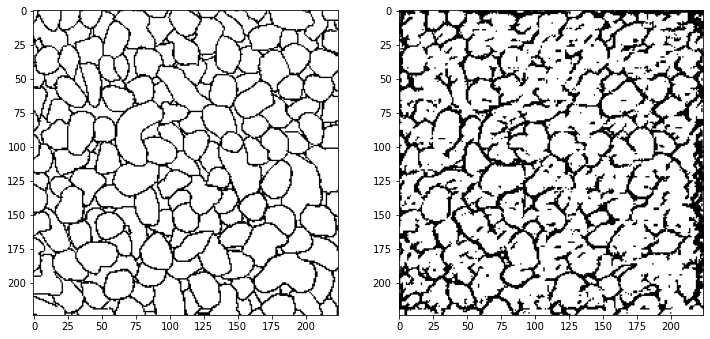

In [ ]:
#tentar printar os datasets
import random
import numpy as np
image_number = random.randint(0, len(name_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(mask_dataset[image_number], (224, 224)), cmap='gray')
plt.subplot(122)
#plt.imshow(np.reshape(result_dataset[image_number], (224, 224)), cmap='gray')
#plt.subplot(122)
plt.imshow(np.reshape(a_result_dataset2[image_number], (224, 224)), cmap='gray')
plt.show()

#tratamento comparaçõões novo

In [ ]:
#IoU preto
def IoUB(resultado, mascara):

  a = resultado/255
  b= mascara/225
  AA = (np.array(a) > 0.5).astype(np.int_)
  BB = (np.array(b) > 0.5).astype(np.int_)
  totalbranco = 0
  totalpreto = 0
  countB = 0
  countW = 0
  countEB = 0
  countEW = 0
  for i in range(224):
    for j in range(224):
      if BB[i][j] == 0:
        totalpreto = totalpreto + 1
        if AA[i][j] == 0:
          countB = countB + 1
        else:
          countEB = countEB + 1

      else:
        totalbranco = totalbranco + 1
        if AA[i][j] == 1:
          countW = countW + 1
        else:
          countEW = countEW + 1

  #erro_total= countEB + countEW
  erro_preto = countB - countEW
  erro_total =  (erro_preto * 100)  / totalpreto
  return erro_total




In [ ]:
# IoU calculation
def IoU (result1, result2):
  intersection = numpy.logical_and(result1, result2)
  union = numpy.logical_or(result1, result2)
  iou_score = numpy.sum(intersection) / numpy.sum(union)
  return  iou_score

In [ ]:
a = np.zeros([224,224])


In [ ]:
a = result_dataset[0]/255
a = (np.array(a) > 0.8).astype(np.int_)
a.shape

(224, 224, 1)

In [ ]:
b =  mask_dataset[0]/255
b = (np.array(b) > 0.5).astype(np.int_)
b.shape

(224, 224, 1)

In [ ]:
b

array([[[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [0],
        ...,
        [1],
        [1],
        [1]]])

In [ ]:
resultado = IoU( a , b)


In [ ]:
resultado

0.8387180771156735

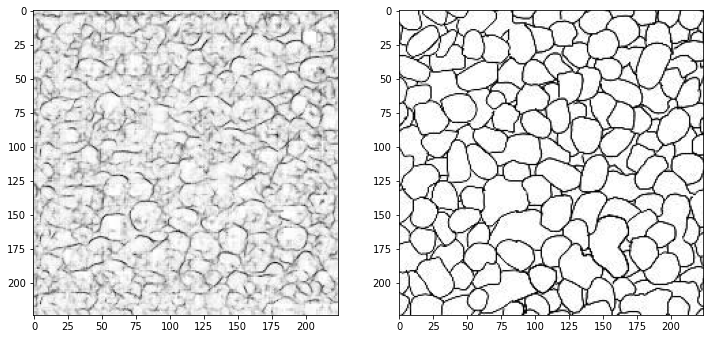

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(result_dataset[0], (224, 224)), cmap='gray')
plt.subplot(122)
#plt.imshow(np.reshape(result_dataset[image_number], (224, 224)), cmap='gray')
#plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[0], (224, 224)), cmap='gray')
plt.show()

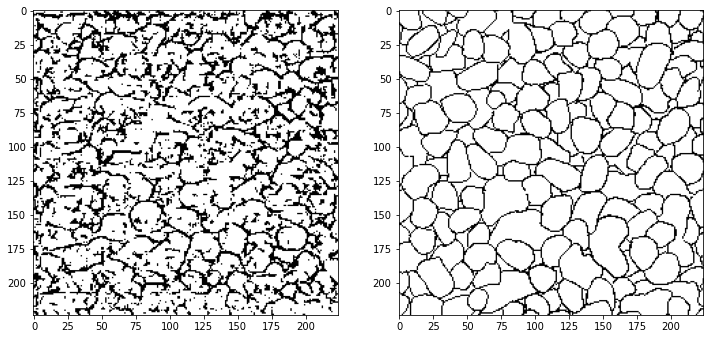

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(a, (224, 224)), cmap='gray')
plt.subplot(122)
#plt.imshow(np.reshape(result_dataset[image_number], (224, 224)), cmap='gray')
#plt.subplot(122)
plt.imshow(np.reshape(b, (224, 224)), cmap='gray')
plt.show()

In [ ]:

resultado_rmse_rede = 0
resultado_psnr_rede = 0
resultado_ssim_rede = 0
resultado_fsim_rede = 0
resultado_issm_rede = 0
resultado_sre_rede = 0
resultado_sam_rede = 0
resultado_uiq_rede = 0
resultado_IoU_rede = 0
resultado_hist_correl = 0
resultado_hist_chisqr = 0
resultado_hist_intersect = 0
resultado_hist_bhattacharyya = 0



resultado_rmse_rede_ind = []
resultado_psnr_rede_ind  = []
resultado_ssim_rede_ind  = []
resultado_fsim_rede_ind  = []
resultado_issm_rede_ind  = []
resultado_sre_rede_ind  = []
resultado_sam_rede_ind  = []
resultado_uiq_rede_ind  = []
resultado_IoU_rede_ind  = []

resultado_hist_correl_ind = []
resultado_hist_chisqr_ind = []
resultado_hist_intersect_ind = []
resultado_hist_bhattacharyya_ind = []

resultado_rmse_rede2 = 0
resultado_psnr_rede2 = 0
resultado_ssim_rede2 = 0
resultado_fsim_rede2 = 0
resultado_issm_rede2 = 0
resultado_sre_rede2 = 0
resultado_sam_rede2 = 0
resultado_uiq_rede2 = 0
resultado_IoU_rede2 = 0


resultado_rmse_rede_ind2 = []
resultado_psnr_rede_ind2  = []
resultado_ssim_rede_ind2  = []
resultado_fsim_rede_ind2  = []
resultado_issm_rede_ind2  = []
resultado_sre_rede_ind2  = []
resultado_sam_rede_ind2  = []
resultado_uiq_rede_ind2  = []
resultado_IoU_rede_ind2  = []

resultado_hist_correl2 = 0
resultado_hist_chisqr2 = 0
resultado_hist_intersect2 = 0
resultado_hist_bhattacharyya2 = 0

resultado_hist_correl_ind2 = []
resultado_hist_chisqr_ind2 = []
resultado_hist_intersect_ind2 = []
resultado_hist_bhattacharyya_ind2 = []


resultado_rmse_k_means = 0
resultado_psnr_k_means = 0
resultado_ssim_k_means = 0
resultado_fsim_k_means = 0
resultado_issm_k_means = 0
resultado_sam_k_means = 0
resultado_sre_k_means = 0
resultado_uiq_k_means = 0
resultado_IoU_k_means = 0

resultado_rmse_Otsu = 0
resultado_psnr_Otsu = 0
resultado_ssim_Otsu = 0
resultado_fsim_Otsu = 0
resultado_issm_Otsu = 0
resultado_sam_Otsu = 0
resultado_sre_Otsu = 0
resultado_uiq_Otsu = 0
resultado_IoU_Otsu = 0

resultado_rmse_Canny = 0
resultado_psnr_Canny = 0
resultado_ssim_Canny = 0
resultado_fsim_Canny = 0
resultado_issm_Canny = 0
resultado_sam_Canny = 0
resultado_sre_Canny = 0
resultado_uiq_Canny = 0
resultado_IoU_Canny = 0

resultado_rmse_watershed = 0
resultado_psnr_watershed = 0
resultado_ssim_watershed = 0
resultado_fsim_watershed = 0
resultado_issm_watershed = 0
resultado_sre_watershed = 0
resultado_sam_watershed = 0
resultado_uiq_watershed = 0
resultado_IoU_watershed = 0

In [ ]:
result_dataset[0].shape

(224, 224, 1)

In [ ]:
len(result_dataset)

10

In [ ]:
len(name_dataset2)

10

In [ ]:
len(mask_dataset)

0

In [ ]:
#comparação 1 mascara com diversas imagens
for i in range(len(name_dataset2)):
    print (i)
    out_rmse = rmse(result_dataset[i], mask_dataset[0])
    out_psnr = psnr(result_dataset[i], mask_dataset[0])
    out_ssim = ssim(result_dataset[i], mask_dataset[0])
    out_fsim = fsim(result_dataset[i], mask_dataset[0])
    #out_issm = issm(result_dataset[i], mask_dataset2[i])
    out_sre = sre(result_dataset[i], mask_dataset[0])
    #out_sam = sam(result_dataset[i], mask_dataset2[i])
    #out_uiq = uiq(result_dataset[i], mask_dataset2[i])
    out_IoU =  IoU(result_dataset[i], mask_dataset[0])
   # out_correl = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_CORREL)
  #  out_chisqr = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_CHISQR)
   # out_intersect = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_INTERSECT)
    #out_battacharyaa = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_BHATTACHARYYA)


   # resultado_hist_correl_ind.append(out_correl)
   # resultado_hist_chisqr_ind.append(out_chisqr)
   # resultado_hist_intersect_ind.append(out_intersect)
   # resultado_hist_bhattacharyya_ind.append(out_battacharyaa)

    resultado_IoU_rede = resultado_IoU_rede + out_IoU
  #  resultado_hist_correl = resultado_hist_correl + out_correl
   # resultado_hist_chisqr = resultado_hist_chisqr + out_chisqr
   # resultado_hist_intersect = resultado_hist_intersect + out_intersect
   # resultado_hist_bhattacharyya = resultado_hist_bhattacharyya + out_battacharyaa
    resultado_rmse_rede_ind.append(out_rmse)
    resultado_psnr_rede_ind.append(out_psnr)
    resultado_ssim_rede_ind.append(out_ssim)
    resultado_sre_rede_ind.append(out_sre)
    resultado_fsim_rede_ind.append(out_fsim)
    resultado_IoU_rede_ind.append(out_IoU)




    resultado_rmse_rede =  resultado_rmse_rede + out_rmse
    resultado_psnr_rede =  resultado_psnr_rede + out_psnr
    resultado_ssim_rede = resultado_ssim_rede + out_ssim
   # resultado_fsim_rede = resultado_fsim_rede + out_fsim
    #resultado_issm_rede =  resultado_issm_rede + out_issm
    resultado_sre_rede = resultado_sre_rede + out_sre
    #resultado_sam_rede = resultado_sam_rede + out_sam
    #resultado_uiq_rede = resultado_uiq_rede + out_uiq


    print (i)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9


In [ ]:
#print resultado comparação 1 mask com varios resultados
for i in range(len(name_dataset2)):
   print('resultado da rede é')
   print(' %s' % name_dataset2[i])
   print('resultado rmse %s' % resultado_rmse_rede_ind[i])
   print('resultado psnr %s' % resultado_psnr_rede_ind[i])
   print('resultado ssim %s' % resultado_ssim_rede_ind[i])
   print('resultado sre %s' % resultado_sre_rede_ind[i])
   print('resultado fsim %s' % resultado_fsim_rede_ind[i])
   print('resultado IoU %s' % resultado_IoU_rede_ind[i])

resultado da rede é
 esquerda99dscn4984UnetB.jpg
resultado rmse 0.01520977
resultado psnr 36.35754588773685
resultado ssim 0.8222577991967599
resultado sre 52.94048234549281
resultado fsim 0.39028343361341294
resultado IoU 0.9981066645408163
resultado da rede é
 esquerda99dscn4984vgg16B.jpg
resultado rmse 0.015725454
resultado psnr 36.06793645551639
resultado ssim 0.8092424625889353
resultado sre 52.26958747775988
resultado fsim 0.45829023059700336
resultado IoU 0.9981066645408163
resultado da rede é
 esquerda99dscn4984vgg19B.jpg
resultado rmse 0.0154939
resultado psnr 36.196785008220246
resultado ssim 0.8147710657357577
resultado sre 52.35868369908847
resultado fsim 0.46118514388468557
resultado IoU 0.9981066645408163
resultado da rede é
 esquerda99dscn4984resnet50B.jpg
resultado rmse 0.016153844
resultado psnr 35.83448175123172
resultado ssim 0.80096793801031
resultado sre 52.34105697476817
resultado fsim 0.4277021864730946
resultado IoU 0.9980668048469388
resultado da rede é
 esquer

In [ ]:
erro_IoUb = []
erro_IoUb_sum = 0
for i in range(len(name_dataset)):
   ioub_out = IoUB(result_dataset[i], mask_dataset[i])
   erro_IoUb.append(ioub_out)
   erro_IoUb_sum = erro_IoUb_sum + ioub_out

erro_medio =  erro_IoUb_sum / len(name_dataset)
print(erro_medio)

-21.01053193016245


In [ ]:
for i in range(len(name_dataset)):
    print (i)
    out_rmse = rmse(result_dataset[i], mask_dataset[i])
    out_psnr = psnr(result_dataset[i], mask_dataset[i])
    out_ssim = ssim(result_dataset[i], mask_dataset[i])
   # out_fsim = fsim(result_dataset[i], mask_dataset[i])
    #out_issm = issm(result_dataset[i], mask_dataset2[i])
    out_sre = sre(result_dataset[i], mask_dataset[i])
    #out_sam = sam(result_dataset[i], mask_dataset2[i])
    #out_uiq = uiq(result_dataset[i], mask_dataset2[i])
    out_IoU =  IoU(result_dataset[i], mask_dataset[i])
   # out_correl = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_CORREL)
  #  out_chisqr = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_CHISQR)
   # out_intersect = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_INTERSECT)
    #out_battacharyaa = cv2.compareHist(result_dataset[i], mask_dataset[i], cv2.HISTCMP_BHATTACHARYYA)

    resultado_IoU_rede_ind.append(out_IoU)
   # resultado_hist_correl_ind.append(out_correl)
   # resultado_hist_chisqr_ind.append(out_chisqr)
   # resultado_hist_intersect_ind.append(out_intersect)
   # resultado_hist_bhattacharyya_ind.append(out_battacharyaa)

    resultado_IoU_rede = resultado_IoU_rede + out_IoU
  #  resultado_hist_correl = resultado_hist_correl + out_correl
   # resultado_hist_chisqr = resultado_hist_chisqr + out_chisqr
   # resultado_hist_intersect = resultado_hist_intersect + out_intersect
   # resultado_hist_bhattacharyya = resultado_hist_bhattacharyya + out_battacharyaa



    resultado_rmse_rede =  resultado_rmse_rede + out_rmse
    resultado_psnr_rede =  resultado_psnr_rede + out_psnr
    resultado_ssim_rede = resultado_ssim_rede + out_ssim
   # resultado_fsim_rede = resultado_fsim_rede + out_fsim
    #resultado_issm_rede =  resultado_issm_rede + out_issm
    resultado_sre_rede = resultado_sre_rede + out_sre
    #resultado_sam_rede = resultado_sam_rede + out_sam
    #resultado_uiq_rede = resultado_uiq_rede + out_uiq

    print (i)
    out_rmse2 = rmse(result_dataset2[i], mask_dataset[i])
    out_psnr2 = psnr(result_dataset2[i], mask_dataset[i])
    out_ssim2 = ssim(result_dataset2[i], mask_dataset[i])
   # out_fsim2 = fsim(result_dataset2[i], mask_dataset[i])
    #out_issm2 = issm(result_dataset2[i], mask_dataset2[i])
    out_sre2 = sre(result_dataset2[i], mask_dataset[i])
    #out_sam2 = sam(result_dataset2[i], mask_dataset2[i])
    #out_uiq2 = uiq(result_dataset2[i], mask_dataset2[i])
   # out_correl2 = cv2.compareHist(result_dataset2[i], mask_dataset[i], cv2.HISTCMP_CORREL)
  #  out_chisqr2 = cv2.compareHist(result_dataset2[i], mask_dataset[i], cv2.HISTCMP_CHISQR)
  #  out_intersect2 = cv2.compareHist(result_dataset2[i], mask_dataset[i], cv2.HISTCMP_INTERSECT)
  #  out_battacharyaa2 = cv2.compareHist(result_dataset2[i], mask_dataset[i], cv2.HISTCMP_BHATTACHARYYA)
    out_IoU2 =  IoU(result_dataset2[i], mask_dataset[i])

    resultado_rmse_rede2 =  resultado_rmse_rede2 + out_rmse2
    resultado_psnr_rede2 =  resultado_psnr_rede2 + out_psnr2
    resultado_ssim_rede2 = resultado_ssim_rede2 + out_ssim2
 #   resultado_fsim_rede2 = resultado_fsim_rede2 + out_fsim2
    #resultado_issm_rede2 =  resultado_issm_rede2 + out_issm2
    resultado_sre_rede2 = resultado_sre_rede2 + out_sre2
    #resultado_sam_rede2 = resultado_sam_rede2 + out_sam2
    #resultado_uiq_rede2 = resultado_uiq_rede2 + out_uiq2

    resultado_IoU_rede_ind2.append(out_IoU2)
   # resultado_hist_correl_ind2.append(resultado_hist_correl)
    #resultado_hist_chisqr_ind2.append(out_chisqr)
    #resultado_hist_intersect_ind2.append(out_intersect)
    #resultado_hist_bhattacharyya_ind2.append(out_battacharyaa)
    resultado_IoU_rede2 = resultado_IoU_rede2 + out_IoU2
   # resultado_hist_correl2 = resultado_hist_correl2 + out_correl2
   # resultado_hist_chisqr2 = resultado_hist_chisqr2 + out_chisqr2
   # resultado_hist_intersect2 = resultado_hist_intersect2 + out_intersect2
    #resultado_hist_bhattacharyya2 = resultado_hist_bhattacharyya2 + out_battacharyaa2


0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152


In [ ]:
samples = len(name_dataset)

resultado_rmse_rede = resultado_rmse_rede / samples
resultado_psnr_rede = resultado_psnr_rede / samples
resultado_ssim_rede = resultado_ssim_rede / samples
# resultado_fsim_rede = resultado_fsim_rede / samples
#resultado_issm_rede = resultado_issm_rede / samples
resultado_sre_rede = resultado_sre_rede / samples
#resultado_sam_rede = resultado_sam_rede / samples
#resultado_uiq_rede = resultado_uiq_rede / samples
#resultado_IoU_rede = resultado_IoU_rede / samples
#resultado_hist_correl = resultado_hist_correl / samples
#resultado_hist_chisqr = resultado_hist_chisqr / samples
#resultado_hist_intersect = resultado_hist_intersect / samples
#resultado_hist_bhattacharyya = resultado_hist_bhattacharyya / samples
resultado_IoU_rede = resultado_IoU_rede / samples

#resultado_hist_correl2 = resultado_hist_correl2 / samples
#resultado_hist_chisqr2 = resultado_hist_chisqr2 / samples
#resultado_hist_intersect2 = resultado_hist_intersect2 / samples
#resultado_hist_bhattacharyya2 = resultado_hist_bhattacharyya2 / samples
resultado_IoU_rede2 = resultado_IoU_rede2 /samples
resultado_rmse_rede2 = resultado_rmse_rede2 / samples
resultado_psnr_rede2 = resultado_psnr_rede2 / samples
resultado_ssim_rede2 = resultado_ssim_rede2 / samples
# resultado_fsim_rede2 = resultado_fsim_rede2 / samples
#resultado_issm_rede2 = resultado_issm_rede2 / samples
resultado_sre_rede2 = resultado_sre_rede2 / samples
#resultado_sam_rede2 = resultado_sam_rede2 / samples
#resultado_uiq_rede2 = resultado_uiq_rede2 / samples
#resultado_IoU_rede2 = resultado_IoU_rede2 / samples

In [ ]:
   print('resultado da rede vgg19 com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
  # print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
  # print('Histograma correl é %s' % resultado_hist_correl)
 #  print('Histograma chisqr é %s' % resultado_hist_chisqr)
  # print('Histograma intersect é %s' % resultado_hist_intersect)
 #  print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
  # print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
 #  print('Histograma correl é %s' % resultado_hist_correl2)
  # print('Histograma chisqr é %s' % resultado_hist_chisqr2)
  # print('Histograma intersect é %s' % resultado_hist_intersect2)
  # print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede vgg19 com binary é
rmse é 0.00015882679560221533
psnr é 75.98519381542127
ssim é 0.9999135968529871
sre é 21.044355631357742
IoU é 0.550476166002618
resultado da rede jacard é
rmse é 0.00011789767015103902
psnr é 78.57273067054564
ssim é 0.9999678783232414
sre é 23.909392081461018
IoU é 0.7428531983834327


In [ ]:
   print('resultado da rede vgg19 com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede vgg19 com binary é
rmse é 0.01861172176975136
psnr é 34.66363203655615
ssim é 0.7624138398656678
fsim é 0.44832912592344903
sre é 51.51162585412189
IoU é 0.9791862535487788
Histograma correl é 0.0004750666802522471
Histograma chisqr é 1584447.0612909873
Histograma intersect é 9807283.083138198
Histograma bhattacharyya é 0.1794878052830942
resultado da rede jacard é
rmse é 0.018278020735209188
psnr é 34.8786177171363
ssim é 0.7928007910069094
fsim é 0.2557242361553957
sre é 52.76946620266564
IoU é 0.9791950247541249
Histograma correl é 0.05821886758298592
Histograma chisqr é 1178182.7716478147
Histograma intersect é 11013676.65079001
Histograma bhattacharyya é 0.17067933939207316


In [ ]:
   print('resultado da rede vgg16 com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede vgg16 com binary é
rmse é 0.018940744824552287
psnr é 34.508288033117196
ssim é 0.7545389801636895
fsim é 0.4451831479327825
sre é 51.39727363293248
IoU é 0.97918337642331
Histograma correl é -1.1424981437459128e-05
Histograma chisqr é 1678208.758785086
Histograma intersect é 9758754.928790264
Histograma bhattacharyya é 0.18123151192465575
resultado da rede jacard é
rmse é 0.01599177361931652
psnr é 36.01615298123099
ssim é 0.8238293345650395
fsim é 0.55618045040135
sre é 52.39785356360478
IoU é 0.9791799421105445
Histograma correl é 0.3844474087085707
Histograma chisqr é 1265579.4982341696
Histograma intersect é 10248516.055046853
Histograma bhattacharyya é 0.16023965148140776


In [ ]:
   print('resultado da rede resnet101 com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede resnet101 com binary é
rmse é 0.0184416956648541
psnr é 34.793214910536356
ssim é 0.7898170880428731
fsim é 0.24402058881452912
sre é 52.72701383715387
IoU é 0.9791952740232283
Histograma correl é 0.0006767022354063922
Histograma chisqr é 1223371.319524638
Histograma intersect é 10993005.640575306
Histograma bhattacharyya é 0.17172766180871418
resultado da rede jacard é
rmse é 0.016688616137641173
psnr é 35.62402426531848
ssim é 0.8096189666362643
fsim é 0.5467175097263516
sre é 51.653791821595966
IoU é 0.9791901564032249
Histograma correl é 0.2928757054159423
Histograma chisqr é 1271810.6586625134
Histograma intersect é 9605340.320007933
Histograma bhattacharyya é 0.16434467880634235


In [ ]:
   print('resultado da rede resnet50 com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede resnet50 com binary é
rmse é 0.01917373642635842
psnr é 34.402134833047135
ssim é 0.7504354971458053
fsim é 0.42337105199794195
sre é 51.579396892035234
IoU é 0.9791806506001709
Histograma correl é 0.000251367628684147
Histograma chisqr é 1692526.1565300217
Histograma intersect é 9991734.852715846
Histograma bhattacharyya é 0.18256397539169944
resultado da rede jacard é
rmse é 0.017410861489673454
psnr é 35.24690680832601
ssim é 0.7975461481068119
fsim é 0.5649110321163033
sre é 51.91139695440387
IoU é 0.9790740592158407
Histograma correl é 0.3404001103302568
Histograma chisqr é 2217402.886070304
Histograma intersect é 10137870.252216484
Histograma bhattacharyya é 0.169420047884439


In [ ]:
   print('resultado da rede densenet com binary é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede densenet com binary é
rmse é 0.02047765942135205
psnr é 33.82380121281677
ssim é 0.7230214958240777
fsim é 0.41823701015601406
sre é 51.55109335345413
IoU é 0.9790333059603352
Histograma correl é -0.0002413045458415225
Histograma chisqr é 3166116.7167698774
Histograma intersect é 10227823.133777743
Histograma bhattacharyya é 0.19318824658683054
resultado da rede jacard é
rmse é 0.017087605982087552
psnr é 35.442784533211956
ssim é 0.80922884964594
fsim é 0.5364921246882552
sre é 52.60573229294
IoU é 0.9790069486911714
Histograma correl é 0.32668601174362866
Histograma chisqr é 1861131.672744159
Histograma intersect é 10712224.707264379
Histograma bhattacharyya é 0.1664806837295141


In [ ]:
   print('resultado da rede unet é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)
   print('Histograma correl é %s' % resultado_hist_correl)
   print('Histograma chisqr é %s' % resultado_hist_chisqr)
   print('Histograma intersect é %s' % resultado_hist_intersect)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)
   print('IoU é %s' % resultado_IoU_rede2)
   print('Histograma correl é %s' % resultado_hist_correl2)
   print('Histograma chisqr é %s' % resultado_hist_chisqr2)
   print('Histograma intersect é %s' % resultado_hist_intersect2)
   print('Histograma bhattacharyya é %s' % resultado_hist_bhattacharyya2)

resultado da rede unet é
rmse é 0.01858297812441985
psnr é 34.69292665452694
ssim é 0.7686580706792928
fsim é 0.3746298172155507
sre é 52.05429563250901
IoU é 0.9791787608779687
Histograma correl é -6.52799089977843e-05
Histograma chisqr é 1490351.1982814746
Histograma intersect é 10350326.261013096
Histograma bhattacharyya é 0.17822910232901398
resultado da rede jacard é
rmse é 0.01662973678826044
psnr é 35.68085134954191
ssim é 0.8150410376488937
fsim é 0.5421492931744447
sre é 52.591047519282284
IoU é 0.9791195062446536
Histograma correl é 0.3455262854593304
Histograma chisqr é 1501801.3653947108
Histograma intersect é 10587555.996264933
Histograma bhattacharyya é 0.16390226919911452


In [ ]:
   print('resultado da rede é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)

   print('resultado da rede jacard é')
   print('rmse é %s' % resultado_rmse_rede2)
   print('psnr é %s' % resultado_psnr_rede2)
   print('ssim é %s' % resultado_ssim_rede2)
   print('fsim é %s' % resultado_fsim_rede2)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede2)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)

resultado da rede é
rmse é 4.153826645416266e-08
psnr é 178.8158087047983
ssim é 0.9999999998309262
fsim é 0.9999987200137512
sre é 123.7354855865781
resultado da rede jacard é
rmse é 4.153826645416266e-08
psnr é 178.8158087047983
ssim é 0.9999999998309262
fsim é 0.9999987200137512
sre é 123.7354855865781


#antigo leitura

In [ ]:
path = '/content/drive/My Drive/Unet/codigoOK/Unet'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    #binarizando = rgb2gray(binarizando)
    result_dataset.append(binarizando)

ValueError: ignored

In [ ]:
img.shape

AttributeError: ignored

In [ ]:
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Mask'
files=os.listdir(path2)
SIZE = 224

for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2)) #imagens
    mask_dataset2.append(binarizando)
    mask_dataset.append(img_to_array(rgb2gray(binarizando)))
    #mask_dataset.append(img_to_array(binarizando))

    name_dataset.append(j)
   # trueee = truepercent(img_to_array(imge2))

path = '/content/drive/My Drive/Unet/codigoOK/Unet'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    #binarizando = rgb2gray(binarizando)
    result_dataset.append(binarizando)
path = '/content/drive/My Drive/Unet/unet_novo_dataset/Image'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    image_dataset.append(binarizando)


100%|██████████| 1200/1200 [00:21<00:00, 55.46it/s] 


ValueError: ignored

In [ ]:
Otsu_dataset = []
Kmeans_dataset = []
Canny_dataset = []
watershed_dataset = []
for l in range(len(name_dataset)):
 #   temporary2 = image_dataset[l]
 # temporary = array_to_img(image_dataset[l])
  temporary = image_dataset[l]
  tempKmeans = trueKmeans(temporary)
  tempWatershed = truewatershed(temporary)
  tempCanny = truekanny(temporary)
  tempOtsu = trueotsu(temporary)

  #tempKmeans = np.reshape(tempKmeans,(224,224))
  #tempWatershed =  np.reshape(tempWatershed,(224,224))
  #tempCanny = np.reshape(tempCanny,(224,224))
  #tempOtsu = np.reshape(tempOtsu,(224,224))
#  tempKmeans = cv2.resize(tempKmeans, dsize=(224,224), interpolation= cv2.INTER_CUBIC)
 # tempWatershed = cv2.resize(tempWatershed, dsize=(224,224), interpolation= cv2.INTER_CUBIC)
 # tempCanny = cv2.resize(tempCanny, dsize=(224,224), interpolation= cv2.INTER_CUBIC)
 # tempOtsu = cv2.resize(tempOtsu, dsize=(224,224), interpolation= cv2.INTER_CUBIC)

  Kmeans_dataset.append(img_to_array(tempKmeans))
  watershed_dataset.append(img_to_array(tempWatershed))
  Canny_dataset.append(img_to_array(tempCanny))
  Otsu_dataset.append(img_to_array(tempOtsu))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
tempCanny.shape

(224, 224)

In [ ]:
Canny_dataset[1].shape

(224, 224, 1)

In [ ]:
mask_dataset[1].shape

(224, 224, 1)

In [ ]:
img = mask_dataset[1]
res = cv2.resize(img, dsize=(224,224), interpolation= cv2.INTER_CUBIC)

In [ ]:
res.shape

(224, 224)

In [ ]:

resultado_rmse_rede = 0
resultado_psnr_rede = 0
resultado_ssim_rede = 0
resultado_fsim_rede = 0
resultado_issm_rede = 0
resultado_sre_rede = 0
resultado_sam_rede = 0
resultado_uiq_rede = 0
resultado_IoU_rede = 0

resultado_rmse_k_means = 0
resultado_psnr_k_means = 0
resultado_ssim_k_means = 0
resultado_fsim_k_means = 0
resultado_issm_k_means = 0
resultado_sam_k_means = 0
resultado_sre_k_means = 0
resultado_uiq_k_means = 0
resultado_IoU_k_means = 0

resultado_rmse_Otsu = 0
resultado_psnr_Otsu = 0
resultado_ssim_Otsu = 0
resultado_fsim_Otsu = 0
resultado_issm_Otsu = 0
resultado_sam_Otsu = 0
resultado_sre_Otsu = 0
resultado_uiq_Otsu = 0
resultado_IoU_Otsu = 0

resultado_rmse_Canny = 0
resultado_psnr_Canny = 0
resultado_ssim_Canny = 0
resultado_fsim_Canny = 0
resultado_issm_Canny = 0
resultado_sam_Canny = 0
resultado_sre_Canny = 0
resultado_uiq_Canny = 0
resultado_IoU_Canny = 0

resultado_rmse_watershed = 0
resultado_psnr_watershed = 0
resultado_ssim_watershed = 0
resultado_fsim_watershed = 0
resultado_issm_watershed = 0
resultado_sre_watershed = 0
resultado_sam_watershed = 0
resultado_uiq_watershed = 0
resultado_IoU_watershed = 0


In [ ]:
x =  len(mask_dataset)

In [ ]:
print (x)

1100


In [ ]:
for i in range(len(name_dataset)):
    print (i)
    out_rmse = rmse(result_dataset[i], mask_dataset2[i])
    out_psnr = psnr(result_dataset[i], mask_dataset2[i])
    out_ssim = ssim(result_dataset[i], mask_dataset2[i])
    out_fsim = fsim(result_dataset[i], mask_dataset2[i])
    #out_issm = issm(result_dataset[i], mask_dataset2[i])
    out_sre = sre(result_dataset[i], mask_dataset2[i])
    #out_sam = sam(result_dataset[i], mask_dataset2[i])
    #out_uiq = uiq(result_dataset[i], mask_dataset2[i])

    resultado_rmse_rede =  resultado_rmse_rede + out_rmse
    resultado_psnr_rede =  resultado_psnr_rede + out_psnr
    resultado_ssim_rede = resultado_ssim_rede + out_ssim
    resultado_fsim_rede = resultado_fsim_rede + out_fsim
    #resultado_issm_rede =  resultado_issm_rede + out_issm
    resultado_sre_rede = resultado_sre_rede + out_sre
    #resultado_sam_rede = resultado_sam_rede + out_sam
    #resultado_uiq_rede = resultado_uiq_rede + out_uiq

In [ ]:
samples = len(name_dataset)

resultado_rmse_rede = resultado_rmse_rede / samples
resultado_psnr_rede = resultado_psnr_rede / samples
resultado_ssim_rede = resultado_ssim_rede / samples
resultado_fsim_rede = resultado_fsim_rede / samples
#resultado_issm_rede = resultado_issm_rede / samples
resultado_sre_rede = resultado_sre_rede / samples
#resultado_sam_rede = resultado_sam_rede / samples
#resultado_uiq_rede = resultado_uiq_rede / samples
#resultado_IoU_rede = resultado_IoU_rede / samples

In [ ]:
   print('resultado da rede é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   #print('issm é  %s' % resultado_issm_rede)
   #print('sam é %s' % resultado_sam_rede)
   print('sre é %s' % resultado_sre_rede)
   #print('uiq é %s' % resultado_uiq_rede)
   #print('IoU é %s' % resultado_IoU_rede)

resultado da rede é
rmse é 0.012183966695641478
psnr é 38.343722684492086
ssim é 0.9177485194016236
fsim é 0.630264257885657
sre é 53.62134393838722


In [ ]:
for i in range(len(name_dataset)):
    print (i)
    #_watershed
    out_rmse = rmse(watershed_dataset[i], mask_dataset[i])
    out_psnr = psnr(watershed_dataset[i], mask_dataset[i])
    out_ssim = ssim(watershed_dataset[i], mask_dataset[i])
    out_fsim = fsim(watershed_dataset[i], mask_dataset[i])
    #out_issm = issm(watershed_dataset[i], mask_dataset[i])
    out_sre = sre(watershed_dataset[i], mask_dataset[i])
    #out_sam = sam(watershed_dataset[i], mask_dataset[i])
   # out_uiq = uiq(watershed_dataset[i], mask_dataset[i])

    resultado_rmse_watershed  =  resultado_rmse_watershed  + out_rmse
    resultado_psnr_watershed  =  resultado_psnr_watershed  + out_psnr
    resultado_ssim_watershed  = resultado_ssim_watershed  + out_ssim
    resultado_fsim_watershed  = resultado_fsim_watershed  + out_fsim
    #resultado_issm_watershed  =  resultado_issm_watershed  + out_issm
    resultado_sre_watershed  = resultado_sre_watershed  + out_sre
    #resultado_sam_watershed  = resultado_sam_watershed  + out_sam
   # resultado_uiq_watershed  = resultado_uiq_watershed  + out_uiq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
samples = len(name_dataset)
resultado_rmse_watershed = resultado_rmse_watershed / samples
resultado_psnr_watershed = resultado_psnr_watershed / samples
resultado_ssim_watershed = resultado_ssim_watershed / samples
resultado_fsim_watershed = resultado_fsim_watershed / samples
#resultado_issm_watershed = resultado_issm_watershed / samples
resultado_sre_watershed  = resultado_sre_watershed  / samples
#resultado_sam_watershed = resultado_sam_watershed / samples
#resultado_uiq_watershed = resultado_uiq_watershed / samples
#resultado_IoU_watershed = resultado_IoU_watershed / samples

In [ ]:
   print('resultado do watershed é')
   print('rmse é %s' % resultado_rmse_watershed)
   print('psnr é %s' % resultado_psnr_watershed)
   print('ssim é %s' % resultado_ssim_watershed)
   print('fsim é %s' % resultado_fsim_watershed)
 #  print('issm é  %s' % resultado_issm_watershed)
   print('sre é  %s' % resultado_sre_watershed)
 #  print('sam é %s' % resultado_sam_watershed)
  # print('uiq é %s' % resultado_uiq_watershed)
  # print('IoU é %s' % resultado_IoU_watershed)

resultado do watershed é
rmse é 0.05681606524934371
psnr é 24.91107524167405
ssim é 0.03125853868247048
fsim é 0.293245158513394
sre é  -2.8186116228200118


In [ ]:
for i in range(len(name_dataset)):
    #_Otsu
    print (i)
    out_rmse = rmse(Otsu_dataset[i], mask_dataset[i])
    out_psnr = psnr(Otsu_dataset[i], mask_dataset[i])
    out_ssim = ssim(Otsu_dataset[i], mask_dataset[i])
    out_fsim = fsim(Otsu_dataset[i], mask_dataset[i])
   # out_issm = issm(Otsu_dataset[i], mask_dataset[i])
    out_sre = sre(Otsu_dataset[i], mask_dataset[i])
    #out_sam = sam(Otsu_dataset[i], mask_dataset[i])
    #out_uiq = uiq(Otsu_dataset[i], mask_dataset[i])

    resultado_rmse_Otsu =  resultado_rmse_Otsu + out_rmse
    resultado_psnr_Otsu =  resultado_psnr_Otsu + out_psnr
    resultado_ssim_Otsu = resultado_ssim_Otsu + out_ssim
    resultado_fsim_Otsu = resultado_fsim_Otsu + out_fsim
  #  resultado_issm_Otsu =  resultado_issm_Otsu + out_issm
    resultado_sre_Otsu = resultado_sre_Otsu + out_sre
   # resultado_sam_Otsu = resultado_sam_Otsu + out_sam
    #resultado_uiq_Otsu = resultado_uiq_Otsu + out_uiq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
samples = len(name_dataset)
resultado_rmse_Otsu = resultado_rmse_Otsu / samples
resultado_psnr_Otsu = resultado_psnr_Otsu / samples
resultado_ssim_Otsu = resultado_ssim_Otsu / samples
resultado_fsim_Otsu = resultado_fsim_Otsu / samples
#resultado_issm_Otsu = resultado_issm_Otsu / samples
resultado_sre_Otsu = resultado_sre_Otsu / samples
#resultado_sam_Otsu = resultado_sam_Otsu / samples
#resultado_uiq_Otsu = resultado_uiq_Otsu / samples
#resultado_IoU_Otsu = resultado_IoU_Otsu / samples

In [ ]:
   print('resultado do Otsu é')
   print('rmse é %s' % resultado_rmse_Otsu)
   print('psnr é %s' % resultado_psnr_Otsu)
   print('ssim é %s' % resultado_ssim_Otsu)
   print('fsim é %s' % resultado_fsim_Otsu)
   #print('issm é  %s' % resultado_issm_Otsu)
   print('sre é  %s' % resultado_sre_Otsu)
   #print('sam é %s' % resultado_sam_Otsu)
   #print('uiq é %s' % resultado_uiq_Otsu)
   #print('IoU é %s' % resultado_IoU_Otsu)

resultado do Otsu é
rmse é 0.05681734623697897
psnr é 24.91088036230114
ssim é 0.031169409034122058
fsim é 0.2839557337801958
sre é  -3.0909494948758525


In [ ]:
for i in range(len(name_dataset)):
    #_Canny
    print (i)
    out_rmse = rmse(Canny_dataset[i], mask_dataset[i])
    out_psnr = psnr(Canny_dataset[i], mask_dataset[i])
    out_ssim = ssim(Canny_dataset[i], mask_dataset[i])
    out_fsim = fsim(Canny_dataset[i], mask_dataset[i])
    #out_issm = issm(Canny_dataset[i], mask_dataset[i])
    out_sre = sre(Canny_dataset[i], mask_dataset[i])
    #out_sam = sam(Canny_dataset[i], mask_dataset[i])
    #out_uiq = uiq(Canny_dataset[i], mask_dataset[i])

    resultado_rmse_Canny =  resultado_rmse_Canny + out_rmse
    resultado_psnr_Canny =  resultado_psnr_Canny + out_psnr
    resultado_ssim_Canny = resultado_ssim_Canny + out_ssim
    resultado_fsim_Canny = resultado_fsim_Canny + out_fsim
   # resultado_issm_Canny =  resultado_issm_Canny + out_issm
    resultado_sre_Canny = resultado_sre_Canny + out_sre
    #resultado_sam_Canny = resultado_sam_Canny + out_sam
    #resultado_uiq_Canny = resultado_uiq_Canny + out_uiq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
samples = len(name_dataset)
resultado_rmse_Canny = resultado_rmse_Canny / samples
resultado_psnr_Canny = resultado_psnr_Canny / samples
resultado_ssim_Canny = resultado_ssim_Canny / samples
resultado_fsim_Canny = resultado_fsim_Canny / samples
#resultado_issm_Canny = resultado_issm_Canny / samples
resultado_sre_Canny = resultado_sre_Canny / samples
#resultado_sam_Canny = resultado_sam_Canny / samples
#resultado_uiq_Canny = resultado_uiq_Canny / samples
#resultado_IoU_Canny = resultado_IoU_Canny / samples


In [ ]:
   print('resultado do Canny é')
   print('rmse é %s' % resultado_rmse_Canny)
   print('psnr é %s' % resultado_psnr_Canny)
   print('ssim é %s' % resultado_ssim_Canny)
   print('fsim é %s' % resultado_fsim_Canny)
   #print('issm é  %s' % resultado_issm_Canny)
   print('sre é  %s' % resultado_sre_Canny)
   #print('sam é %s' % resultado_sam_Canny)
   #print('uiq é %s' % resultado_uiq_Canny)
   #print('IoU é %s' % resultado_IoU_Canny)


resultado do Canny é
rmse é 0.05682507825084031
psnr é 24.909696347821818
ssim é 0.03104660094894067
fsim é 0.2599999633875197
sre é  -3.116287706529209


In [ ]:


for i in range(len(name_dataset)):
    #_k_means
    print (i)
    out_rmse = rmse(Kmeans_dataset[i], mask_dataset[i])
    out_psnr = psnr(Kmeans_dataset[i], mask_dataset[i])
    out_ssim = ssim(Kmeans_dataset[i], mask_dataset[i])
    out_fsim = fsim(Kmeans_dataset[i], mask_dataset[i])
    #out_issm = issm(Kmeans_dataset[i], mask_dataset[i])
    out_sre = sre(Kmeans_dataset[i], mask_dataset[i])
    #out_sam = sam(Kmeans_dataset[i], mask_dataset[i])
    #out_uiq = uiq(Kmeans_dataset[i], mask_dataset[i])

    resultado_rmse_k_means =  resultado_rmse_k_means + out_rmse
    resultado_psnr_k_means =  resultado_psnr_k_means + out_psnr
    resultado_ssim_k_means = resultado_ssim_k_means + out_ssim
    resultado_fsim_k_means = resultado_fsim_k_means + out_fsim
   # resultado_issm_k_means =  resultado_issm_k_means + out_issm
    resultado_sre_k_means = resultado_sre_k_means + out_sre
    #resultado_sam_k_means = resultado_sam_k_means + out_sam
    #resultado_uiq_k_means = resultado_uiq_k_means + out_uiq

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
samples = len(name_dataset)
resultado_rmse_k_means = resultado_rmse_k_means / samples
resultado_psnr_k_means = resultado_psnr_k_means / samples
resultado_ssim_k_means = resultado_ssim_k_means / samples
resultado_fsim_k_means = resultado_fsim_k_means / samples
#resultado_issm_k_means = resultado_issm_k_means / samples
resultado_sre_k_means = resultado_sre_k_means / samples
#resultado_sam_k_means = resultado_sam_k_means / samples
#resultado_uiq_k_means = resultado_uiq_k_means / samples
#resultado_IoU_k_means = resultado_IoU_k_means / samples

In [ ]:
   print('resultado do k-means é')
   print('rmse é %s' % resultado_rmse_k_means)
   print('psnr é %s' % resultado_psnr_k_means)
   print('ssim é %s' % resultado_ssim_k_means)
   print('fsim é %s' % resultado_fsim_k_means)
   #print('issm é  %s' % resultado_issm_k_means)
   print('sre é  %s' % resultado_sre_k_means)
   #print('sam é %s' % resultado_sam_k_means)
   #print('uiq é %s' % resultado_uiq_k_means)
   #print('IoU é %s' % resultado_IoU_k_means)

resultado do k-means é
rmse é 0.056801165311286844
psnr é 24.913350529779063
ssim é 0.031789869354612074
fsim é 0.2965803924611498
sre é  -1.8867438681279953


In [ ]:
result_dataset[1].shape

(224, 224)

In [ ]:
samples = len(name_dataset)

resultado_rmse_rede = resultado_rmse_rede / samples
resultado_psnr_rede = resultado_psnr_rede / samples
resultado_ssim_rede = resultado_ssim_rede / samples
resultado_fsim_rede = resultado_fsim_rede / samples
resultado_issm_rede = resultado_issm_rede / samples
resultado_sam_rede = resultado_sam_rede / samples
resultado_uiq_rede = resultado_uiq_rede / samples
resultado_IoU_rede = resultado_IoU_rede / samples

resultado_rmse_k_means = resultado_rmse_k_means / samples
resultado_psnr_k_means = resultado_psnr_k_means / samples
resultado_ssim_k_means = resultado_ssim_k_means / samples
resultado_fsim_k_means = resultado_fsim_k_means / samples
resultado_issm_k_means = resultado_issm_k_means / samples
resultado_sam_k_means = resultado_sam_k_means / samples
resultado_uiq_k_means = resultado_uiq_k_means / samples
resultado_IoU_k_means = resultado_IoU_k_means / samples

resultado_rmse_Otsu = resultado_rmse_Otsu / samples
resultado_psnr_Otsu = resultado_psnr_Otsu / samples
resultado_ssim_Otsu = resultado_ssim_Otsu / samples
resultado_fsim_Otsu = resultado_fsim_Otsu / samples
resultado_issm_Otsu = resultado_issm_Otsu / samples
resultado_sam_Otsu = resultado_sam_Otsu / samples
resultado_uiq_Otsu = resultado_uiq_Otsu / samples
resultado_IoU_Otsu = resultado_IoU_Otsu / samples

resultado_rmse_Canny = resultado_rmse_Canny / samples
resultado_psnr_Canny = resultado_psnr_Canny / samples
resultado_ssim_Canny = resultado_ssim_Canny / samples
resultado_fsim_Canny = resultado_fsim_Canny / samples
resultado_issm_Canny = resultado_issm_Canny / samples
resultado_sam_Canny = resultado_sam_Canny / samples
resultado_uiq_Canny = resultado_uiq_Canny / samples
resultado_IoU_Canny = resultado_IoU_Canny / samples

resultado_rmse_watershed = resultado_rmse_watershed / samples
resultado_psnr_watershed = resultado_psnr_watershed / samples
resultado_ssim_watershed = resultado_ssim_watershed / samples
resultado_fsim_watershed = resultado_fsim_watershed / samples
resultado_issm_watershed = resultado_issm_watershed / samples
resultado_sam_watershed = resultado_sam_watershed / samples
resultado_uiq_watershed = resultado_uiq_watershed / samples
resultado_IoU_watershed = resultado_IoU_watershed / samples


In [ ]:
   print('resultado da rede é')
   print('rmse é %s' % resultado_rmse_rede)
   print('psnr é %s' % resultado_psnr_rede)
   print('ssim é %s' % resultado_ssim_rede)
   print('fsim é %s' % resultado_fsim_rede)
   print('issm é  %s' % resultado_issm_rede)
   print('sam é %s' % resultado_sam_rede)
   print('uiq é %s' % resultado_uiq_rede)
   print('IoU é %s' % resultado_IoU_rede)



   print('resultado do k-means é')
   print('rmse é %s' % resultado_rmse_k_means)
   print('psnr é %s' % resultado_psnr_k_means)
   print('ssim é %s' % resultado_ssim_k_means)
   print('fsim é %s' % resultado_fsim_k_means)
   print('issm é  %s' % resultado_issm_k_means)
   print('sam é %s' % resultado_sam_k_means)
   print('uiq é %s' % resultado_uiq_k_means)
   print('IoU é %s' % resultado_IoU_k_means)

   print('resultado do watershed é')
   print('rmse é %s' % resultado_rmse_watershed)
   print('psnr é %s' % resultado_psnr_watershed)
   print('ssim é %s' % resultado_ssim_watershed)
   print('fsim é %s' % resultado_fsim_watershed)
   print('issm é  %s' % resultado_issm_watershed)
   print('sam é %s' % resultado_sam_watershed)
   print('uiq é %s' % resultado_uiq_watershed)
   print('IoU é %s' % resultado_IoU_watershed)

   print('resultado do Canny é')
   print('rmse é %s' % resultado_rmse_Canny)
   print('psnr é %s' % resultado_psnr_Canny)
   print('ssim é %s' % resultado_ssim_Canny)
   print('fsim é %s' % resultado_fsim_Canny)
   print('issm é  %s' % resultado_issm_Canny)
   print('sam é %s' % resultado_sam_Canny)
   print('uiq é %s' % resultado_uiq_Canny)
   print('IoU é %s' % resultado_IoU_Canny)

   print('resultado do Otsu é')
   print('rmse é %s' % resultado_rmse_Otsu)
   print('psnr é %s' % resultado_psnr_Otsu)
   print('ssim é %s' % resultado_ssim_Otsu)
   print('fsim é %s' % resultado_fsim_Otsu)
   print('issm é  %s' % resultado_issm_Otsu)
   print('sam é %s' % resultado_sam_Otsu)
   print('uiq é %s' % resultado_uiq_Otsu)
   print('IoU é %s' % resultado_IoU_Otsu)

#IoU


In [ ]:
image_directory = '/content/drive/My Drive/Unet/fastaiunet/Image'
mask_directory = '/content/drive/My Drive/Unet/fastaiunet/Mask'
result_directory = '/content/drive/My Drive/Unet/Saida2'


Mask_criado = []
Mask_rede = []
name_dataset = []
resultado_IoU = []

In [ ]:
SIZE = 224
path2 = '/content/drive/My Drive/Unet/fastaiunet/Mask'
files=os.listdir(path2)
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_criado.append(binarizando)
    name_dataset.append(j)

100%|██████████| 1200/1200 [00:15<00:00, 78.36it/s]


In [ ]:
path = '/content/drive/My Drive/Unet/Saida2'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_rede.append(binarizando)


In [ ]:
soma = 0
for i in range(len(name_dataset)):
    intersection = numpy.logical_and(Mask_criado[i], Mask_rede[i])
    union = numpy.logical_or(Mask_criado[i], Mask_rede[i])
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    resultado_IoU.append(iou_score)
    soma=soma + iou_score
    print('IoU is %s' % iou_score)
soma=soma/(len(name_dataset))
print ('Media é' % soma)

IoU is 0.9456237890657906
IoU is 0.9169474358709357
IoU is 0.9421084704448507
IoU is 0.9377741400658985
IoU is 0.9428420384859378
IoU is 0.9170864732087097
IoU is 0.93399110324036
IoU is 0.9340372723065921
IoU is 0.9085354370252569
IoU is 0.9363949386341072
IoU is 0.9132331047786794
IoU is 0.9367471792374944
IoU is 0.9459282424037527
IoU is 0.9472481915478658
IoU is 0.930720871751886
IoU is 0.9472784449462864
IoU is 0.9417555029635369
IoU is 0.9408235785953177
IoU is 0.9165173330037694
IoU is 0.9399013336677955
IoU is 0.9415501905972046
IoU is 0.9462630728679534
IoU is 0.943275039745628
IoU is 0.9440498653719762
IoU is 0.9441004219232142
IoU is 0.9455953655311379
IoU is 0.9404063678257226
IoU is 0.9222272877984085
IoU is 0.9430847795223868
IoU is 0.941878457723043
IoU is 0.9405913352663549
IoU is 0.9271755084923464
IoU is 0.9387125595643295
IoU is 0.9397275412832338
IoU is 0.9213154740627038
IoU is 0.9396729538350309
IoU is 0.9425184807545246
IoU is 0.9398655668878947
IoU is 0.93733454

In [ ]:
print (soma)

0.9440313839326863


Text(0.5, 1.0, 'IoU')

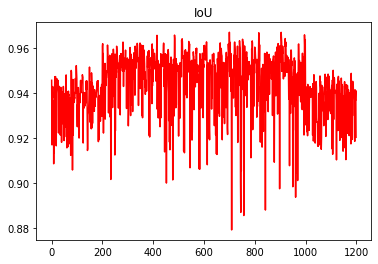

In [ ]:
plt.figure()
#plt.plot(pequeno_correto, "b")
plt.plot(resultado_IoU, "r")

plt.title('IoU')

#Measures

  --org_img_path FILE   Path to original input image
  --pred_img_path FILE  Path to predicted image\
  --metric METRIC       select an evaluation metric (fsim, issm, psnr, rmse,
                        sam, sre, ssim, uiq, all) (can be repeated)


                        https://github.com/up42/image-similarity-measures

Root Mean Square Error (RMSE)

Peak signal-to-noise ratio( psnr)

Structural Similar Index Measure (SSIM)

Feature Similarity Indexing Method (FSIM)

Information theoretic-based Statistic Similarity Measure (ISSM)

Signal to Reconstruction Error ratio (SRE)

Spectral Angle Mapper (SAM)

Universal Image Quality index (UIQ)



In [ ]:
from image_similarity_measures.quality_metrics import rmse, psnr, ssim, fsim, issm, sre, sam, uiq



ModuleNotFoundError: ignored

In [ ]:
image_directory = '/content/drive/My Drive/Unet/fastaiunet/Image'
mask_directory = '/content/drive/My Drive/Unet/fastaiunet/Mask'
result_directory = '/content/drive/My Drive/Unet/Saida2'


Mask_criado = []
Mask_rede = []
name_dataset = []
resultado_rmse = []
resultado_psnr = []
resultado_ssim = []
resultado_fsim = []
resultado_issm = []
resultado_sam = []
resultado_uiq = []
resultado_IoU = []


In [ ]:
SIZE = 224
path2 = '/content/drive/My Drive/Unet/fastaiunet/Mask'
files=os.listdir(path2)
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    binarizando = (img_to_array(imge2))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_criado.append(binarizando)
    name_dataset.append(j)

In [ ]:
path = '/content/drive/My Drive/Unet/Saida2'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    Mask_rede.append(binarizando)

In [ ]:
soma = 0
for i in range(len(name_dataset)):
    intersection = numpy.logical_and(Mask_criado[i], Mask_rede[i])
    union = numpy.logical_or(Mask_criado[i], Mask_rede[i])
    iou_score = numpy.sum(intersection) / numpy.sum(union)
    resultado_IoU.append(iou_score)
    soma=soma + iou_score
    print('IoU is %s' % iou_score)
    out_rmse = rmse(Mask_criado[i], Mask_rede[i])
    out_psnr = psnr(Mask_criado[i], Mask_rede[i])
    out_ssim = ssim(Mask_criado[i], Mask_rede[i])
    out_fsim = fsim(Mask_criado[i], Mask_rede[i])
    out_issm = issm(Mask_criado[i], Mask_rede[i])
    out_sre = sre(Mask_criado[i], Mask_rede[i])
    out_sam = sam(Mask_criado[i], Mask_rede[i])
    out_uiq = uiq(Mask_criado[i], Mask_rede[i])

    resultado_rmse.append(out_rmse)
    resultado_psnr.append(out_psnr)
    resultado_ssim.append(out_ssim)
    resultado_fsim.append(out_fsim)
    resultado_issm.append(out_issm)
    resultado_sre.append(out_sre)
    resultado_sam.append(out_sam)
    resultado_uiq.append(out_uiq)


soma=soma/(len(name_dataset))
print ('Media é' % soma)

In [ ]:

in_img1 = cv2.imread('img1.png')
in_img2 = cv2.imread('img2.png')

out_rmse = rmse(in_img1, in_img2)
out_psnr = psnr(in_img1, in_img2)

#Tratamento

In [ ]:
image_directory = '/content/drive/My Drive/Unet/fastaiunet/Image'
mask_directory = '/content/drive/My Drive/Unet/fastaiunet/Mask'
result_directory = '/content/drive/My Drive/Unet/Saida2'



image_dataset = []  #data usando listas
image_dataset_color = []
mask_dataset = []
result_dataset = []
name_dataset = []

In [ ]:
path2 = '/content/drive/My Drive/Unet/fastaiunet/Mask'
files=os.listdir(path2)
SIZE = 224
porcentagenscorretas = []
pequeno_correto = []
pequeno_calculado = []
pequeno_simulado = []
medio_correto = []
medio_calculado = []
medio_simulado = []
grande_correto = []
grande_calculado = []
grande_simulado = []
pequeno_erro = []
medio_erro = []
grande_erro = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    mask_dataset.append(img_to_array(imge2)) #imagens

    name_dataset.append(j)
  #  porcentagenscorretas.append([int(i.replace(".png","")) for i in j.split("-")]) #correta

    trueee = truepercent(img_to_array(imge2)) #calculada

  #  pequeno_correto.append(porcentagenscorretas[-1][2])
    pequeno_calculado.append(trueee[2])
#    medio_correto.append(porcentagenscorretas[-1][1])
    medio_calculado.append(trueee[1])
 #   grande_correto.append(porcentagenscorretas[-1][0])
    grande_calculado.append(trueee[0])
   # pequeno_erro.append(abs( porcentagenscorretas[-1][2]-trueee[2]))
   # medio_erro.append( abs(porcentagenscorretas[-1][1] - trueee[1]))
   # grande_erro.append( abs(porcentagenscorretas[-1][0]- trueee[0]))

path = '/content/drive/My Drive/Unet/Saida2'
files=os.listdir(path)
for i in range(len(name_dataset)):
    img = cv2.imread(path+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    where_0 = np.where(binarizando >= 125)
    where_1 = np.where(binarizando < 125)
    binarizando[where_0] = 255
    binarizando[where_1] = 0
    result_dataset.append(binarizando)
    truepercentagen= truepercent(binarizando)
    pequeno_simulado.append(truepercentagen[2])
    medio_simulado.append(truepercentagen[1])
    grande_simulado.append(truepercentagen[0])
path3 = '/content/drive/My Drive/Unet/fastaiunet/Image'
for i in range(len(name_dataset)):
    img = cv2.imread(path3+'/'+name_dataset[i],1)
    binarizando = (img_to_array(img))
    image_dataset.append(binarizando)

100%|██████████| 1200/1200 [13:18<00:00,  1.50it/s]


#Analise deterministicos

In [ ]:
    Otsu_dataset = []
    Otsu_pequeno = []
    Otsu_medio = []
    Otsu_grande = []
    Kmeans_dataset = []
    Kmeans_pequeno = []
    Kmeans_medio = []
    Kmeans_grande = []
    Canny_dataset = []
    Canny_pequeno = []
    Canny_medio = []
    Canny_grande = []
    watershed_dataset = []
    watershed_pequeno = []
    watershed_medio = []
    watershed_grande = []

for l in range(len(name_dataset)):
 #   temporary2 = image_dataset[l]
 # temporary = array_to_img(image_dataset[l])
  temporary = image_dataset[l]
  tempKmeans = trueKmeans(temporary)
  tempWatershed = truewatershed(temporary)
  tempCanny = truekanny(temporary)
  tempOtsu = trueotsu(temporary)

  Kmeans_dataset.append(img_to_array(tempKmeans))
  watershed_dataset.append(img_to_array(tempWatershed))
  Canny_dataset.append(img_to_array(tempCanny))
  Otsu_dataset.append(img_to_array(tempOtsu))




  Kmeans = truepercent(img_to_array(tempKmeans))
  Watershed = truepercent(img_to_array(tempWatershed))
  Canny = truepercent(img_to_array(tempCanny))
  Otsu = truepercent(img_to_array(tempOtsu))


  Kmeans_pequeno.append(Kmeans[2])
  Kmeans_medio.append(Kmeans[1])
  Kmeans_grande.append(Kmeans[0])


  Otsu_pequeno.append(Otsu[2])
  Otsu_medio.append(Otsu[1])
  Otsu_grande.append(Otsu[0])


  Canny_pequeno.append(Canny[2])
  Canny_medio.append(Canny[1])
  Canny_grande.append(Canny[0])

  watershed_pequeno.append(Watershed[2])
  watershed_medio.append(Watershed[1])
  watershed_grande.append(Watershed[0])


IndexError: ignored

In [ ]:
somerrorp = 0
somerrorm = 0
somerrorg = 0
somerror = 0

somerrorKmeansp = 0
somerrorKmeansm = 0
somerrorKmeansg = 0
somerrorKmeans = 0

somerrorwatershedp = 0
somerrorwatershedm = 0
somerrorwatershedg = 0
somerrorwatershed = 0

somerrorOtsup = 0
somerrorOtsum = 0
somerrorOtsug = 0
somerrorOtsu = 0

somerrorCannyp = 0
somerrorCannym = 0
somerrorCannyg = 0
somerrorCanny = 0
for k in range(len(name_dataset)):
  somerrorp= somerrorp + math.pow((pequeno_simulado[k]-pequeno_calculado[k]),2)
  somerrorm= somerrorm + math.pow((medio_simulado[k]-medio_calculado[k]),2)
  somerrorg= somerrorg + math.pow((grande_simulado[k]-grande_calculado[k]),2)

  somerrorKmeansp= somerrorKmeansp + math.pow((Kmeans_pequeno[k]-pequeno_calculado[k]),2)
  somerrorKmeansm= somerrorKmeansm + math.pow((Kmeans_medio[k]-medio_calculado[k]),2)
  somerrorKmeansg= somerrorKmeansg + math.pow((Kmeans_grande[k]-grande_calculado[k]),2)

  somerrorwatershedp= somerrorwatershedp + math.pow((watershed_pequeno[k]-pequeno_calculado[k]),2)
  somerrorwatershedm= somerrorwatershedm + math.pow((watershed_medio[k]-medio_calculado[k]),2)
  somerrorwatershedg= somerrorwatershedg + math.pow((watershed_grande[k]-grande_calculado[k]),2)

  somerrorOtsup= somerrorOtsup + math.pow((Otsu_pequeno[k]-pequeno_calculado[k]),2)
  somerrorOtsum= somerrorOtsum + math.pow((Otsu_medio[k]-medio_calculado[k]),2)
  somerrorOtsug= somerrorOtsug + math.pow((Otsu_grande[k]-grande_calculado[k]),2)

  somerrorCannyp= somerrorCannyp + math.pow((Canny_pequeno[k]-pequeno_calculado[k]),2)
  somerrorCannym= somerrorCannym + math.pow((Canny_medio[k]-medio_calculado[k]),2)
  somerrorCannyg= somerrorCannyg + math.pow((Canny_grande[k]-grande_calculado[k]),2)

g = len(name_dataset)
somerrorp = somerrorp/g
somerrorm = somerrorm/g
somerrorg = somerrorg/g
somerror = somerrorp + somerrorm + somerrorg


somerrorKmeansp = somerrorKmeansp/g
somerrorKmeansm = somerrorKmeansm/g
somerrorKmeansg = somerrorKmeansg/g
somerrorKmeans = somerrorKmeansp + somerrorKmeansm + somerrorKmeansg

somerrorwatershedp = somerrorwatershedp/g
somerrorwatershedm = somerrorwatershedm/g
somerrorwatershedg = somerrorwatershedg/g
somerrorwatershed = somerrorwatershedp + somerrorwatershedm + somerrorwatershedg

somerrorOtsup = somerrorOtsup/g
somerrorOtsum = somerrorOtsum/g
somerrorOtsug = somerrorOtsug/g
somerrorOtsu = somerrorOtsup + somerrorOtsum + somerrorOtsug

somerrorCannyp = somerrorCannyp/g
somerrorCannym = somerrorCannym/g
somerrorCannyg = somerrorCannyg/g
somerrorCanny = somerrorCannyp + somerrorCannym + somerrorCannyg

print( "erro pequeno rede: ",somerrorp)
print('erro medio rede: ', somerrorm)
print('erro grande rede: ', somerrorg)
print('erro geral rede: ',somerror)
print("   ")
print( "erro pequeno k-means: ",somerrorKmeansp)
print('erro medio k-means: ', somerrorKmeansm)
print('erro grande k-means: ', somerrorKmeansg)
print('erro geral k-means: ',somerrorKmeans)
print("   ")
print( "erro pequeno watershed: ",somerrorwatershedp)
print('erro medio watershed: ', somerrorwatershedm)
print('erro grande watershed: ', somerrorwatershedg)
print('erro geral watershed: ',somerrorwatershed)

print("   ")
print( "erro pequeno Otsu: ",somerrorOtsup)
print('erro medio Otsu: ', somerrorOtsum)
print('erro grande Otsu: ', somerrorOtsug)
print('erro geral Otsu: ',somerrorOtsu)
print("   ")
print( "erro pequeno Canny: ",somerrorCannyp)
print('erro medio Canny: ', somerrorCannym)
print('erro grande Canny: ', somerrorCannyg)
print('erro geral Canny: ',somerrorCanny)

erro pequeno rede:  2.863167885034012
erro medio rede:  7.8223985213228495
erro grande rede:  14.632533711851696
erro geral rede:  25.31810011820856
   
erro pequeno k-means:  584.0423188188331
erro medio k-means:  49.85750119595044
erro grande k-means:  613.3703284848714
erro geral k-means:  1247.270148499655
   
erro pequeno watershed:  6.018896562298818
erro medio watershed:  47.77440235767827
erro grande watershed:  65.74750838093112
erro geral watershed:  119.54080730090821
   
erro pequeno Otsu:  8.87797250947672
erro medio Otsu:  46.084190095324246
erro grande Otsu:  84.15865916337987
erro geral Otsu:  139.12082176818083
   
erro pequeno Canny:  176.53186970941795
erro medio Canny:  47.842464184008236
erro grande Canny:  93.46399391785661
erro geral Canny:  317.8383278112828


In [ ]:

print( "erro pequeno rede: ",somerrorp)
print('erro medio rede: ', somerrorm)
print('erro grande rede: ', somerrorg)
print('erro geral rede: ',somerror)
print("   ")
print( "erro pequeno k-means: ",somerrorKmeansp)
print('erro medio k-means: ', somerrorKmeansm)
print('erro grande k-means: ', somerrorKmeansg)
print('erro geral k-means: ',somerrorKmeans)
print("   ")
print( "erro pequeno watershed: ",somerrorwatershedp)
print('erro medio watershed: ', somerrorwatershedm)
print('erro grande watershed: ', somerrorwatershedg)
print('erro geral watershed: ',somerrorwatershed)

print("   ")
print( "erro pequeno Otsu: ",somerrorOtsup)
print('erro medio Otsu: ', somerrorOtsum)
print('erro grande Otsu: ', somerrorOtsug)
print('erro geral Otsu: ',somerrorOtsu)
print("   ")
print( "erro pequeno Canny: ",somerrorCannyp)
print('erro medio Canny: ', somerrorCannym)
print('erro grande Canny: ', somerrorCannyg)
print('erro geral Canny: ',somerrorCanny)

erro pequeno rede:  2.863167885034012
erro medio rede:  7.8223985213228495
erro grande rede:  14.632533711851696
erro geral rede:  25.31810011820856
   
erro pequeno k-means:  584.0423188188331
erro medio k-means:  49.85750119595044
erro grande k-means:  613.3703284848714
erro geral k-means:  1247.270148499655
   
erro pequeno watershed:  6.018896562298818
erro medio watershed:  47.77440235767827
erro grande watershed:  65.74750838093112
erro geral watershed:  119.54080730090821
   
erro pequeno Otsu:  8.87797250947672
erro medio Otsu:  46.084190095324246
erro grande Otsu:  84.15865916337987
erro geral Otsu:  139.12082176818083
   
erro pequeno Canny:  176.53186970941795
erro medio Canny:  47.842464184008236
erro grande Canny:  93.46399391785661
erro geral Canny:  317.8383278112828


In [ ]:
somerrorp = 0
somerrorm = 0
somerrorg = 0
somerror = 0
for k in range(len(name_dataset)):
  somerrorp= somerrorp + math.pow((pequeno_simulado[k]-pequeno_calculado[k]),2)
  somerrorm= somerrorm + math.pow((medio_simulado[k]-medio_calculado[k]),2)
  somerrorg= somerrorg + math.pow((grande_simulado[k]-grande_calculado[k]),2)
g = len(name_dataset)
somerrorp = somerrorp/g
somerrorm = somerrorm/g
somerrorg = somerrorg/g
somerror = somerrorp + somerrorm + somerrorg

print( "erro pequeno: ",somerrorp)
print('erro medio: ', somerrorm)
print('erro grande: ', somerrorg)
print('erro geral: ',somerror)

erro pequeno:  2.863167885034012
erro medio:  7.8223985213228495
erro grande:  14.632533711851696
erro geral:  25.31810011820856


In [ ]:
  Kmeans_dataset.append(img_to_array(tempKmeans))
  watershed_dataset.append(img_to_array(tempWatershed))
  Canny_dataset.append(img_to_array(tempCanny))
  Otsu_dataset.append(img_to_array(tempOtsu))


<PIL.Image.Image image mode=RGB size=224x224 at 0x7F64BABE76D0>


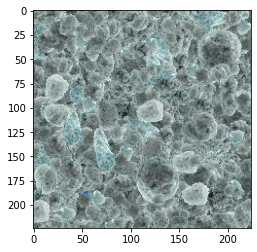

In [ ]:
#ski.imshow(image_dataset[50])
y = array_to_img(image_dataset[70])
print(y)
plt.imshow(y)

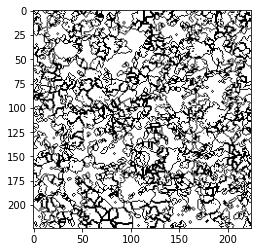

In [ ]:
plt.imshow(np.reshape(watershed_dataset[850], (224, 224)), cmap='gray')
plt.show()

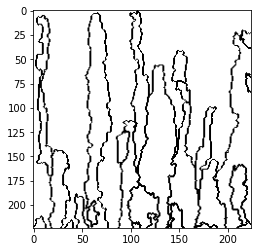

In [ ]:
plt.imshow(np.reshape(Kmeans_dataset[50], (224, 224)), cmap='gray')
plt.show()

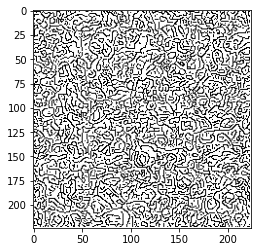

In [ ]:
plt.imshow(np.reshape(Canny_dataset[850], (224, 224)), cmap='gray')
plt.show()

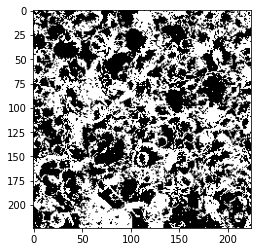

In [ ]:
plt.imshow(np.reshape(Otsu_dataset[850], (224, 224)), cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


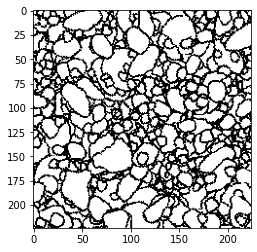

In [ ]:
plt.imshow(np.reshape(mask_dataset[850], (224, 224, 3)), cmap='gray')
plt.show()

In [ ]:
print(name_dataset[850])

34-25-41-951.png


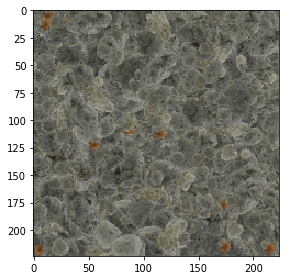

In [ ]:
path2 = '/content/drive/My Drive/Unet/Image/34-25-41-951.png'
image_seg_orig= ski.imread(path2)
ski.imshow(image_seg_orig)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


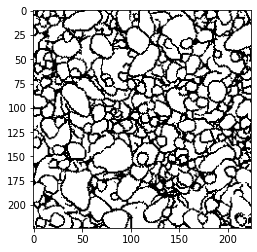

In [ ]:
plt.imshow(np.reshape(result_dataset[850], (224, 224, 3)), cmap='gray')
plt.show()

#plot graficos


Text(0.5, 1.0, 'GRANDES')

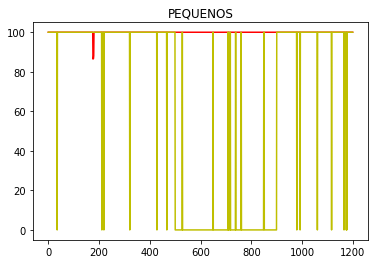

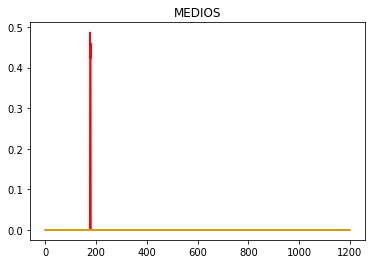

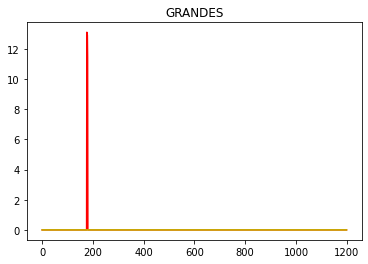

In [ ]:
plt.figure()
#plt.plot(pequeno_correto, "b")
plt.plot(pequeno_calculado, "r")
plt.plot(pequeno_simulado,"y")
plt.title('PEQUENOS')
plt.figure()
#plt.plot(medio_correto, "b")
plt.plot(medio_calculado, "r")
plt.plot(medio_simulado, "y")
plt.title('MEDIOS')
plt.figure()
#plt.plot(grande_correto, "b")
plt.plot(grande_calculado, "r")
plt.plot(grande_simulado, "y")
plt.title('GRANDES')





In [ ]:
path2 = '/content/drive/My Drive/Unet/Mask2'
files=os.listdir(path2)
SIZE = 224
porcentagenscorretas = []
for file in files:
  print([int(i.replace(".png","")) for i in file.split("-")])
  porcentagenscorretas.append([i.replace(".png","") for i in file.split("-")])

In [ ]:
for kk in range(len(mask_dataset)):
  trueee = truepercent(mask_dataset[kk])
  print(trueee)

In [ ]:
trueee = truepercent(image_seg_orig)

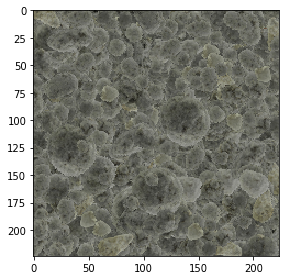

In [ ]:
path2 = '/content/drive/My Drive/3c_simulado/38-60-2-151.png'
image_seg_orig= ski.imread(path2)
ski.imshow(image_seg_orig)

#40% analise

In [ ]:

mask_directory = '/content/drive/My Drive/Unet/Mask3'




mask_dataset3 = []

In [ ]:
path2 = '/content/drive/My Drive/Unet/mask3'
files=os.listdir(path2)
SIZE = 224
porcentagenscorretas3 = []
pequeno_correto3 = []
pequeno_calculado3 = []
medio_correto3 = []
medio_calculado3 = []
grande_correto3 = []
grande_calculado3 = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    mask_dataset3.append(img_to_array(imge2)) #imagens


    porcentagenscorretas3.append([int(i.replace(".png","")) for i in j.split("-")]) #correta

    trueee = truepercent(img_to_array(imge2)) #calculada

    pequeno_correto3.append(porcentagenscorretas3[-1][2])
    pequeno_calculado3.append(trueee[2])
    medio_correto3.append(porcentagenscorretas3[-1][1])
    medio_calculado3.append(trueee[1])
    grande_correto3.append(porcentagenscorretas3[-1][0])
    grande_calculado3.append(trueee[0])


100%|██████████| 80/80 [00:02<00:00, 30.25it/s]


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


65-31-4-51.png


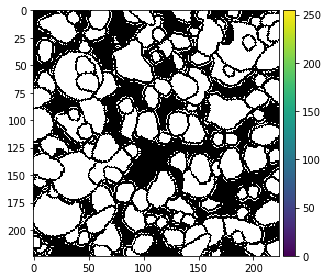

In [ ]:
ski.imshow(mask_dataset3[50])
print(files[50])

Text(0.5, 1.0, 'GRANDES')

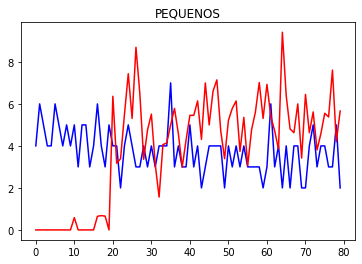

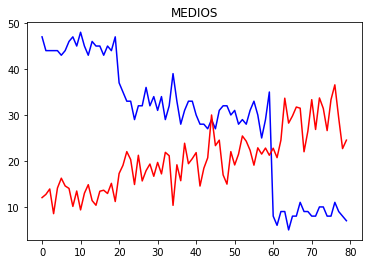

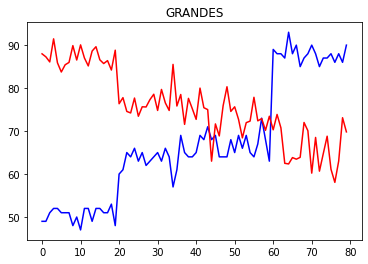

In [ ]:
plt.figure()
plt.plot(pequeno_correto3, "b")
plt.plot(pequeno_calculado3, "r")
plt.title('PEQUENOS')
plt.figure()
plt.plot(medio_correto3, "b")
plt.plot(medio_calculado3, "r")
plt.title('MEDIOS')
plt.figure()
plt.plot(grande_correto3, "b")
plt.plot(grande_calculado3, "r")
plt.title('GRANDES')

#30% analise

In [ ]:
path2 = '/content/drive/My Drive/Unet/Mask4'
files=os.listdir(path2)
SIZE = 224
mask_dataset4 = []
porcentagenscorretas4 = []
pequeno_correto4 = []
pequeno_calculado4 = []
medio_correto4 = []
medio_calculado4 = []
grande_correto4 = []
grande_calculado4 = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    mask_dataset4.append(img_to_array(imge2)) #imagens


    porcentagenscorretas4.append([int(i.replace(".png","")) for i in j.split("-")]) #correta

    trueee = truepercent(img_to_array(imge2)) #calculada

    pequeno_correto4.append(porcentagenscorretas4[-1][2])
    pequeno_calculado4.append(trueee[2])
    medio_correto4.append(porcentagenscorretas4[-1][1])
    medio_calculado4.append(trueee[1])
    grande_correto4.append(porcentagenscorretas4[-1][0])
    grande_calculado4.append(trueee[0])

100%|██████████| 487/487 [00:17<00:00, 28.03it/s]


Text(0.5, 1.0, 'GRANDES')

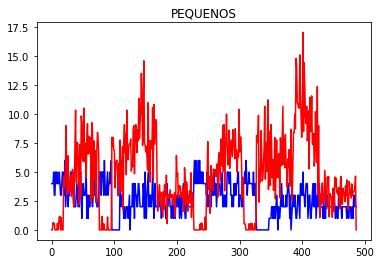

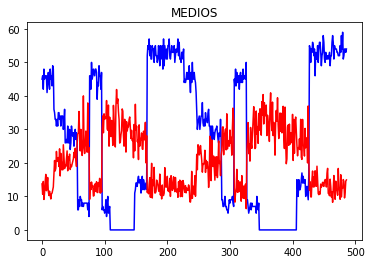

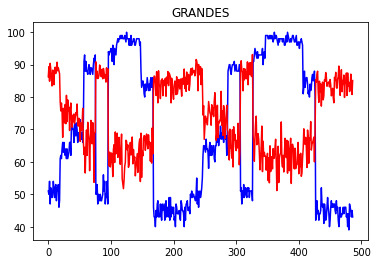

In [ ]:
plt.figure()
plt.plot(pequeno_correto4, "b")
plt.plot(pequeno_calculado4, "r")
plt.title('PEQUENOS')
plt.figure()
plt.plot(medio_correto4, "b")
plt.plot(medio_calculado4, "r")
plt.title('MEDIOS')
plt.figure()
plt.plot(grande_correto4, "b")
plt.plot(grande_calculado4, "r")
plt.title('GRANDES')

#original

In [ ]:
path2 = '/content/drive/My Drive/Unet/Mask'
files=os.listdir(path2)
SIZE = 224
mask_dataset5 = []
porcentagenscorretas5 = []
pequeno_correto5 = []
pequeno_calculado5 = []
medio_correto5 = []
medio_calculado5 = []
grande_correto5 = []
grande_calculado5 = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    mask_dataset5.append(img_to_array(imge2)) #imagens


    porcentagenscorretas5.append([int(i.replace(".png","")) for i in j.split("-")]) #correta

    trueee = truepercent(img_to_array(imge2)) #calculada

    pequeno_correto5.append(porcentagenscorretas5[-1][2])
    pequeno_calculado5.append(trueee[2])
    medio_correto5.append(porcentagenscorretas5[-1][1])
    medio_calculado5.append(trueee[1])
    grande_correto5.append(porcentagenscorretas5[-1][0])
    grande_calculado5.append(trueee[0])

100%|██████████| 1100/1100 [01:13<00:00, 15.03it/s]


Text(0.5, 1.0, 'GRANDES')

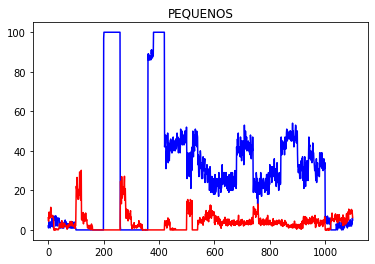

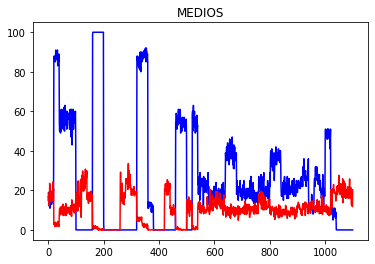

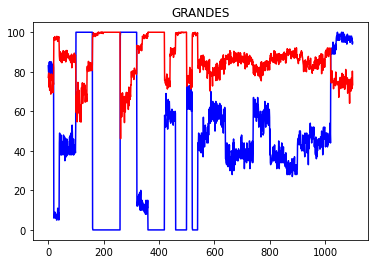

In [ ]:
plt.figure()
plt.plot(pequeno_correto5, "b")
plt.plot(pequeno_calculado5, "r")
plt.title('PEQUENOS')
plt.figure()
plt.plot(medio_correto5, "b")
plt.plot(medio_calculado5, "r")
plt.title('MEDIOS')
plt.figure()
plt.plot(grande_correto5, "b")
plt.plot(grande_calculado5, "r")
plt.title('GRANDES')

#erros

In [ ]:
path2 = '/content/drive/My Drive/Unet/Mask'
files=os.listdir(path2)
SIZE = 224
mask_dataset7 = []
porcentagenscorretas7 = []
pequeno_correto7 = []
pequeno_calculado7 = []

medio_correto7 = []
medio_calculado7 = []

grande_correto7 = []
grande_calculado7 = []
pequeno_erro7 = []
medio_erro7 = []
grande_erro7 = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    mask_dataset7.append(img_to_array(imge2)) #imagens


    porcentagenscorretas7.append([int(i.replace(".png","")) for i in j.split("-")]) #correta

    trueee = truepercent(img_to_array(imge2)) #calculada

    pequeno_correto7.append(porcentagenscorretas7[-1][2])
    pequeno_calculado7.append(trueee[2])
    pequeno_erro7.append(abs( porcentagenscorretas7[-1][2]-trueee[2]))
    medio_correto7.append(porcentagenscorretas7[-1][1])
    medio_calculado7.append(trueee[1])
    medio_erro7.append( abs(porcentagenscorretas7[-1][1] - trueee[1]))
    grande_correto7.append(porcentagenscorretas7[-1][0])
    grande_calculado7.append(trueee[0])
    grande_erro7.append( abs(porcentagenscorretas7[-1][0]- trueee[0]))



100%|██████████| 1100/1100 [00:45<00:00, 24.26it/s]


Text(0.5, 1.0, 'GRANDES')

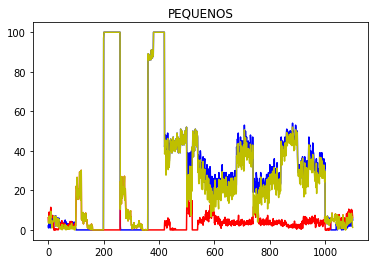

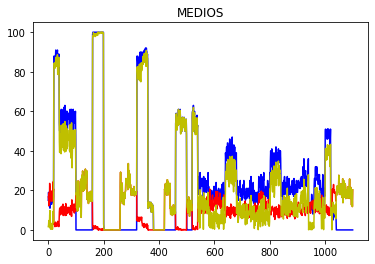

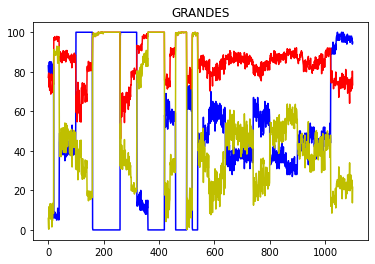

In [ ]:
plt.figure()
plt.plot(pequeno_correto7, "b")
plt.plot(pequeno_calculado7, "r")
plt.plot(pequeno_erro7,"y")
plt.title('PEQUENOS')
plt.figure()
plt.plot(medio_correto7, "b")
plt.plot(medio_calculado7, "r")
plt.plot(medio_erro7, "y")
plt.title('MEDIOS')
plt.figure()
plt.plot(grande_correto7, "b")
plt.plot(grande_calculado7, "r")
plt.plot(grande_erro7, "y")
plt.title('GRANDES')



/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0-3-97-301.png


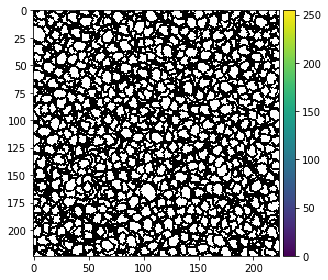

In [ ]:
ski.imshow(mask_dataset7[200])
print(files[200])

In [ ]:
ski.imshow(mask_dataset7[200])
print(files[200])

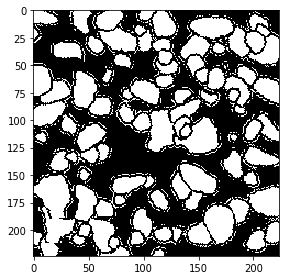

In [ ]:
img_seg_filename='/content/drive/My Drive/Unet/Mask2/65-32-3-60.png'
image_seg_orig= ski.imread(img_seg_filename)
ski.imshow(image_seg_orig)

In [ ]:
trueee = truepercent(image_seg_orig)
print(trueee)

[95.25483304042179, 4.042179261862917, 0.70298769771529]


#tratamento reais

In [ ]:
SIZE = 224
path1 = '/content/drive/My Drive/Unet/ReaisER'
files=os.listdir(path1)
for i in tqdm(files):
    imge=cv2.imread(path1+'/'+i,1)   #mudar 0 para 1 em imagens com cor
     #print(imge.shape)
    imge=cv2.resize(imge,(SIZE, SIZE))
    image_dataset.append(img_to_array(imge))

  0%|          | 0/15 [00:00<?, ?it/s]


NameError: ignored

In [ ]:
path2 = '/content/drive/My Drive/Unet/ReaisER'
files=os.listdir(path2)
SIZE = 224
img_dataset2 = []
name_dataset = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_dataset2.append(img_to_array(imge2)) #imagens
    name_dataset.append(j)


100%|██████████| 15/15 [00:10<00:00,  1.46it/s]


In [ ]:
os.chdir('/content/drive/My Drive/Unet/ReaisCR')
for k in range(len(img_dataset2)):
  temporaria = img_dataset2[k]
  img_pil = array_to_img(temporaria)
  img_pil.save(name_dataset[k])


In [ ]:
img_dataset2 = np.array(img_dataset2)/255

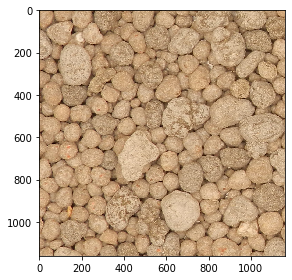

In [ ]:
path2 = '/content/drive/My Drive/Unet/ReaisER/5.png'
image_seg_orig= ski.imread(path2)
ski.imshow(image_seg_orig)

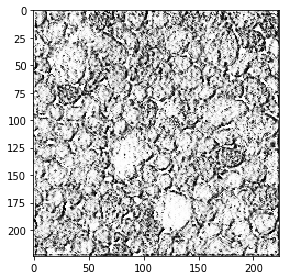

In [ ]:
path2 = '/content/drive/My Drive/Unet/Saida2/5.png'
image_seg_orig= ski.imread(path2)
ski.imshow(image_seg_orig)

In [ ]:
image_dataset = np.array(image_dataset)/255.

#Histogram equalization


In [ ]:
!pip install opencv-contrib-python
!pip install scikit-image==0.18.1

     |████████████████████████████████| 29.2 MB 65.8 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from skimage import exposure
import matplotlib.pyplot as plt
import argparse
import cv2

In [ ]:
path2 = '/content/drive/My Drive/Unet/reais'
files=os.listdir(path2)
SIZE = 224
img_dataset2 = []
name_dataset = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_dataset2.append(img_to_array(imge2)) #imagens
    name_dataset.append(j)


100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


In [ ]:
path1 = '/content/drive/My Drive/Unet/Image/47-19-34-1100.png'
imge=cv2.imread(path1,1)


In [ ]:
os.chdir('/content/drive/My Drive/Unet/histogram')
for k in range(len(img_dataset2)):
  temporaria = img_dataset2[k]
  multi = True if temporaria.shape[-1] > 1 else False
  matched = exposure.match_histograms(temporaria, imge, multichannel=multi)
  img_pil = array_to_img(matched)
  img_pil.save(name_dataset[k])


#Random crop


In [ ]:
path2 = '/content/drive/My Drive/Unet/real'
files=os.listdir(path2)
SIZE = 224
img_dataset2 = []
name_dataset = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=np.flip(imge2, axis=-1)
    #imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_dataset2.append(imge2) #imagens
    name_dataset.append(j)


100%|██████████| 3/3 [00:07<00:00,  2.38s/it]


In [ ]:
path2 = '/content/drive/My Drive/Unet/mascara'
files=os.listdir(path2)
SIZE = 224
img_mask = []
for j in tqdm(name_dataset):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=np.flip(imge2, axis=-1)
    #imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_mask.append(imge2) #imagens


100%|██████████| 3/3 [00:06<00:00,  2.30s/it]


In [ ]:
name_dataset[2]

'DSCN4983.jpg'

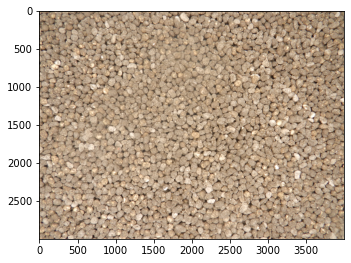

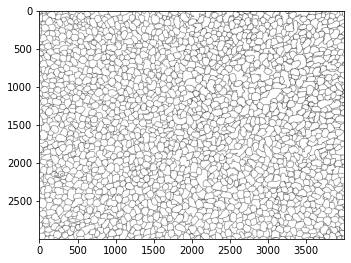

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_dataset2[2])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_mask[2])

In [ ]:
os.chdir('/content/drive/My Drive/Unet/unet_novo_dataset')
SIZE = 224
for k in range(len(img_dataset2)):
  temporaria = img_dataset2[k]
  temporariamask = img_mask[k]
  temporaria2 = array_to_img(temporaria, scale = False)
  temporariamask2 = array_to_img(temporariamask, scale = False)

  for x in range(0, 100):
    #_, h, w = F.get_dimensions(temporaria2)
  # h,w= F.get_image_size(temporaria2)
    i, j, h, w = T.RandomCrop.get_params(temporaria2, output_size=(900, 900))
   # th, tw = 1500
    #th = 1500
    #tw = 1500
    #i = torch.randint(0, h - th + 1, size=(1,)).item()
  #  j = torch.randint(0, w - tw + 1, size=(1,)).item()
    img = TF.crop(temporaria2, i, j, h, w)
    img2 = TF.crop(temporariamask2, i, j, h, w)
    imgem =  np.array(img)
    imgem2 =  np.array(img2)
    imgresize=cv2.resize(imgem,(SIZE, SIZE), interpolation=cv2.INTER_LINEAR)
    img2resize=cv2.resize(imgem2,(SIZE, SIZE), interpolation=cv2.INTER_LINEAR)
    #pagina das imagens
    os.chdir('/content/drive/My Drive/Unet/unet_novo_dataset/Imagecrop')
    img_pil = array_to_img(imgresize)
    img_pil.save(str(x)+name_dataset[k])

    #pagina das mascaras
    os.chdir('/content/drive/My Drive/Unet/unet_novo_dataset/Maskcrop')
    img_pil = array_to_img(img2resize)
    img_pil.save(str(x)+name_dataset[k])


#Rotate

In [ ]:
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Imagecrop'
files=os.listdir(path2)
SIZE = 224
img_dataset2 = []
name_dataset = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=np.flip(imge2, axis=-1)
    #imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_dataset2.append(imge2) #imagens
    name_dataset.append(j)

100%|██████████| 300/300 [00:00<00:00, 307.08it/s]


In [ ]:
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Image'
files=os.listdir(path2)
os.chdir('/content/drive/My Drive/Unet/unet_novo_dataset/Image')
SIZE = 224
for k in range(len(img_dataset2)):

  temporaria = img_dataset2[k]
  image = array_to_img(temporaria)
  img_pil = array_to_img(image)
  img_pil.save("Original"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_90_CLOCKWISE)
  img_pil = array_to_img(image)
  img_pil.save("Direita"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_180)
  img_pil = array_to_img(image)
  img_pil.save("Vertical"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_180)
  image2 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
  img_pil = array_to_img(image2)
  img_pil.save("Esquerda"+name_dataset[k])

  #image = temporaria.mirror(image)
  #img_pil = array_to_img(image)
  #img_pil.save("H"+name_dataset[k])



In [ ]:
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Maskcrop'
files=os.listdir(path2)
SIZE = 224
img_dataset2 = []
name_dataset2 = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=np.flip(imge2, axis=-1)
    #imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_dataset2.append(imge2) #imagens
    name_dataset2.append(j)

100%|██████████| 300/300 [00:01<00:00, 272.24it/s]


In [ ]:
path2 = '/content/drive/My Drive/Unet/unet_novo_dataset/Mask'
files=os.listdir(path2)
os.chdir('/content/drive/My Drive/Unet/unet_novo_dataset/Mask')
SIZE = 224

for k in range(len(img_dataset2)):

  temporaria = img_dataset2[k]
  image = array_to_img(temporaria)
  img_pil = array_to_img(image)
  img_pil.save("Original"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_90_CLOCKWISE)
  img_pil = array_to_img(image)
  img_pil.save("Direita"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_180)
  img_pil = array_to_img(image)
  img_pil.save("Vertical"+name_dataset[k])

  image = cv2.rotate(temporaria, cv2.ROTATE_180)
  image2 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
  img_pil = array_to_img(image2)
  img_pil.save("Esquerda"+name_dataset[k])
  #image = temporaria.mirror(image)
  #img_pil = array_to_img(image)
  #img_pil.save("H"+name_dataset[k])


#old crop singular

In [ ]:
os.chdir('/content/drive/My Drive/Unet/testecroop')
transform = T.RandomCrop(1500)
SIZE = 224
for k in range(len(img_dataset2)):
  temporaria = img_dataset2[k]
  temporaria2 = array_to_img(temporaria, scale = False)

  for x in range(0, 10):
    img = transform(temporaria2)
  #  np.flip(img, axis=-1)
  #re_size = [cv2.resize(img, (50,50), interpolation=cv2.INTER_LINEAR)
    img =  np.array(img)
    img2=cv2.resize(img,(SIZE, SIZE), interpolation=cv2.INTER_LINEAR)
    img_pil = array_to_img(img2)
    img_pil.save(str(x)+name_dataset[k])


In [ ]:
        i, j, h, w = transforms.RandomCrop.get_params(
        image, output_size=(1500, 512))
        image = TF.crop(image, i, j, h, w)
        mask = TF.crop(mask, i, j, h, w)


In [ ]:
y = array_to_img(img_dataset2[0])
x = np.flip(y, axis=-1)
print(x)
plt.imshow(x)

In [ ]:
y = array_to_img(img_dataset2[0])
print(y)

<PIL.Image.Image image mode=RGB size=4000x3000 at 0x7FAACF5D9A10>


#random crop na mão

In [ ]:
class RandomCrop(torch.nn.Module):
    @staticmethod
    def get_params(img: Tensor, output_size: Tuple[int, int]) -> Tuple[int, int, int, int]:

        """Get parameters for ``crop`` for a random crop.

        Args:
            img (PIL Image or Tensor): Image to be cropped.
            output_size (tuple): Expected output size of the crop.

        Returns:
            tuple: params (i, j, h, w) to be passed to ``crop`` for random crop.
        """
        _, h, w = F.get_dimensions(img)
        th, tw = output_size

        if h + 1 < th or w + 1 < tw:
            raise ValueError(f"Required crop size {(th, tw)} is larger then input image size {(h, w)}")

        if w == tw and h == th:
            return 0, 0, h, w

        i = torch.randint(0, h - th + 1, size=(1,)).item()
        j = torch.randint(0, w - tw + 1, size=(1,)).item()
        return i, j, th, tw

    def __init__(self, size, padding=None, pad_if_needed=False, fill=0, padding_mode="constant"):
        super().__init__()
        _log_api_usage_once(self)

        self.size = tuple(_setup_size(size, error_msg="Please provide only two dimensions (h, w) for size."))

        self.padding = padding
        self.pad_if_needed = pad_if_needed
        self.fill = fill
        self.padding_mode = padding_mode

    def forward(self, img):
        """
        Args:
            img (PIL Image or Tensor): Image to be cropped.

        Returns:
            PIL Image or Tensor: Cropped image.
        """
        if self.padding is not None:
            img = F.pad(img, self.padding, self.fill, self.padding_mode)

        _, height, width = F.get_dimensions(img)
        # pad the width if needed
        if self.pad_if_needed and width < self.size[1]:
            padding = [self.size[1] - width, 0]
            img = F.pad(img, padding, self.fill, self.padding_mode)
        # pad the height if needed
        if self.pad_if_needed and height < self.size[0]:
            padding = [0, self.size[0] - height]
            img = F.pad(img, padding, self.fill, self.padding_mode)

        i, j, h, w = self.get_params(img, self.size)

        return F.crop(img, i, j, h, w)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}(size={self.size}, padding={self.padding})"

In [ ]:
        #pega dados da imagem: output size é o valor dado para saida
        _, h, w = F.get_dimensions(img)
        th, tw = output_size
        #checa se a imagem é maior ou igual ao tamanho do crop
        if h + 1 < th or w + 1 < tw:
            raise ValueError(f"Required crop size {(th, tw)} is larger then input image size {(h, w)}")

        if w == tw and h == th:
            return 0, 0, h, w
        #devolve 2 posições aleatorias dentro da imagem para o crop
        i = torch.randint(0, h - th + 1, size=(1,)).item()
        j = torch.randint(0, w - tw + 1, size=(1,)).item()

        #pega posições aleatorias
         i, j, h, w = self.get_params(img, self.size)
        #crop mudar isso para mandar 2 imagens diferentes
        F.crop(img, i, j, h, w)
        F.crop(img2, i, j, h, w)

In [ ]:
from torch.nn import functional as F

ModuleNotFoundError: ignored

In [ ]:
from torchvision.transforms import functional as T

#APi pytorch

In [ ]:
import torchvision.transforms.functional as TF
class MyDataset(Dataset):
    def __init__(self, image_paths, target_paths, train=True):
        self.image_paths = image_paths
        self.target_paths = target_paths

    def transform(self, image, mask):
        # Resize
        resize = transforms.Resize(size=(520, 520))
        image = resize(image)
        mask = resize(mask)

        # Random crop
        i, j, h, w = transforms.RandomCrop.get_params(
            image, output_size=(512, 512))
        image = TF.crop(image, i, j, h, w)
        mask = TF.crop(mask, i, j, h, w)

        # Random horizontal flipping
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)

        # Random vertical flipping
        if random.random() > 0.5:
            image = TF.vflip(image)
            mask = TF.vflip(mask)

        # Transform to tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        mask = Image.open(self.target_paths[index])
        x, y = self.transform(image, mask)
        return x, y

    def __len__(self):
        return len(self.image_paths)

In [ ]:
path2 = '/content/drive/My Drive/Unet/mascara'
files=os.listdir(path2)
SIZE = 224
img_mask = []
for j in tqdm(files):
    imge2=cv2.imread(path2+'/'+j,1)   #mudar 0 para 1 em imagens com cor
    imge2=np.flip(imge2, axis=-1)
    #imge2=cv2.resize(imge2,(SIZE, SIZE), interpolation=cv2.INTER_CUBIC)
    img_mask.append(imge2) #imagens


100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


#Renomear O lixo


In [ ]:
image_directory = '/content/drive/My Drive/Unet/unet_novo_dataset/Image'
mask_directory = '/content/drive/My Drive/Unet/unet_novo_dataset/Mask'
result_directory = '/content/drive/My Drive/Unet/codigoOK/Unet'
path5 = '/content/drive/My Drive/Unet/codigoOK/binaryfocaljacard/unet'

In [ ]:
import os

path = '/content/drive/My Drive/Unet/codigoOK/binaryfocaljacard/ablationA/'

for file in os.listdir(path):
    os.rename(path + file, path + file.lower())

then = os.listdir(path)
print(then)

['direita0dscn4875.jpg', 'vertical0dscn4875.jpg', 'esquerda0dscn4875.jpg', 'original1dscn4875.jpg', 'direita1dscn4875.jpg', 'vertical1dscn4875.jpg', 'esquerda1dscn4875.jpg', 'original2dscn4875.jpg', 'direita2dscn4875.jpg', 'vertical2dscn4875.jpg', 'esquerda2dscn4875.jpg', 'original3dscn4875.jpg', 'direita3dscn4875.jpg', 'vertical3dscn4875.jpg', 'esquerda3dscn4875.jpg', 'original4dscn4875.jpg', 'direita4dscn4875.jpg', 'vertical4dscn4875.jpg', 'esquerda4dscn4875.jpg', 'original5dscn4875.jpg', 'direita5dscn4875.jpg', 'vertical5dscn4875.jpg', 'esquerda5dscn4875.jpg', 'original6dscn4875.jpg', 'direita6dscn4875.jpg', 'vertical6dscn4875.jpg', 'esquerda6dscn4875.jpg', 'original7dscn4875.jpg', 'direita7dscn4875.jpg', 'vertical7dscn4875.jpg', 'esquerda7dscn4875.jpg', 'original8dscn4875.jpg', 'direita8dscn4875.jpg', 'vertical8dscn4875.jpg', 'esquerda8dscn4875.jpg', 'original9dscn4875.jpg', 'direita9dscn4875.jpg', 'vertical9dscn4875.jpg', 'esquerda9dscn4875.jpg', 'original10dscn4875.jpg', 'direita